In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
import math

In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
from model_equations_separate_NC_store_numba import *

In [4]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR,DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN', ]
cccpalette = [PCOLOR, HCOLOR, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'ABp', 'ABh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (1.0, 0.7725490196078432, 0.5607843137254902),
 (0.19607843137254902, 0.3843137254901961, 0.19607843137254902),
 (1.0, 0.6627450980392157, 0.5607843137254902),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [5]:
refdf = pd.read_excel('reference_10cc_axenic.xlsx')
refp99df = pd.read_excel('reference_pro99_axenic.xlsx')


In [6]:
dpath = r'C:\Users\oweisberg\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = r'C:\Users\Osnat\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = 'results'

os.listdir(dpath)

['sensitivity_baseline_mse.csv.gz',
 'sensitivity_baseline_sum.csv.gz',
 'vpro_ponly_mse.csv.gz',
 'vpro_ponly_df.csv.gz',
 'sensitivity_baseline_df.csv.gz',
 'vpro_ponly_sum.csv.gz']

In [7]:
sum_df = pd.read_csv(os.path.join(dpath,'sensitivity_baseline_sum.csv.gz' ))
df =  pd.read_csv(os.path.join(dpath,'sensitivity_baseline_df.csv.gz' ))
mse_df = pd.read_csv(os.path.join(dpath,'sensitivity_baseline_mse.csv.gz' ))

In [8]:
vprosum_df = pd.read_csv(os.path.join(dpath,'vpro_ponly_sum.csv.gz' ))
vprodf =  pd.read_csv(os.path.join(dpath,'vpro_ponly_df.csv.gz' ))
vpromse_df = pd.read_csv(os.path.join(dpath,'vpro_ponly_mse.csv.gz' ))

In [23]:
vpromse_df['RMSE'] = np.sqrt(vpromse_df['MSE'])

In [24]:
mse_df['RMSE'] = np.sqrt(mse_df['MSE'])

In [9]:
def _params_from_runid_sen(x):
    
    df = x.str.replace(r'_h-*[0-9]+', '', regex=True
         ).str.replace('sensitivity_', '', regex=False
         ).str.replace('baseline_', 'p_1_0_', regex=False
         ).str.rsplit('_', expand=True,n=5)
    df.rename(columns={0:'param', 2:'paramval', 3:'media', 4: 'mode', 5:'model'}, inplace=True)
    df['run_id'] = x
    
    df.loc[df.param.isin(['p']), ['run', ]] = 'base'
    df['run'] = 'sensitivity'
    df.loc[df.param.isin(['p']), ['param', 'paramval', ]] = np.NaN
    return df[['media', 'mode', 'model', 'run', 'run_id', 'param', 'paramval', ]]

senparams = _params_from_runid_sen(sum_df.run_id)

df = pd.merge(df, senparams, on='run_id', how='left')
mse_df = pd.merge(mse_df, senparams, on='run_id', how='left')
#sum_df = pd.merge(sum_df, senparams, on='run_id', how='left')


In [10]:
def _params_from_runid_vpro(x):
    
    df = x.str.replace(r'_h-*[0-9]+', '', regex=True
         ).str.rsplit('_', expand=True)         
    df.rename(columns={5:'vpro', 6:'media', 7: 'mode', 8:'model'}, inplace=True)
    df['vpro'] = df['model'] + '_' + df['vpro']
    df['run_id'] = x
    df['run'] = 'vpro'
    return df[['run_id', 'media', 'mode', 'run', 'model', 'vpro',]]
    return df

vproparams = _params_from_runid_vpro(vprosum_df.run_id)

vprodf = pd.merge(vprodf, vproparams, on='run_id', how='left')
vpromse_df = pd.merge(vpromse_df, vproparams, on='run_id', how='left')

In [11]:
vprosum_df = pd.merge(vprosum_df, vproparams, on='run_id', how='left')

# sensitivity dfs

In [12]:
df.columns

Index(['Bp', 'Np', 'Cp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS',
       't', 'day', 'gross_uptakeINp', 'gross_uptakeONp', 'gross_uptakeICp',
       'gross_uptakeOCp', 'uptakeNp', 'uptakeCp', 'QCp', 'biosynthesisNp',
       'respirationCp', 'biomass_breakdownCp', 'overflowNp', 'overflowCp',
       'Bp[C]', 'Bptotal', 'Bptotal[C]', 'run_id', 'Bh', 'Nh', 'Ch',
       'gross_uptakeINh', 'gross_uptakeONh', 'gross_uptakeICh',
       'gross_uptakeOCh', 'uptakeNh', 'uptakeCh', 'QCh', 'biosynthesisNh',
       'respirationCh', 'biomass_breakdownCh', 'overflowNh', 'overflowCh',
       'Bh[C]', 'Bhtotal', 'Bhtotal[C]', 'media', 'mode', 'model', 'run',
       'param', 'paramval'],
      dtype='object')

In [13]:
df.run_id.unique()

array(['sensitivity_VmaxINp_18_0.00016137600807198754_lowN_ponly_MIN_h-1553020579808776996',
       'sensitivity_gammaDp_13_0.6473684210526316_pro99_ponly_MIN_h-1553020579808776996',
       'sensitivity_KOCp_2_0.04006453669384514_lowN_ponly_MIXOTROPH_h3130721703651793053',
       ..., 'baseline_lowN_ponly_MIN_h-1553020579808776996',
       'baseline_lowN_all_EXOENZYME_h-8244699560045786876',
       'baseline_pro99_ponly_MIN_h-1553020579808776996'], dtype=object)

In [14]:
params_list = senparams['param'].dropna().unique()

In [15]:
vprosum_df.describe()

,Mh,Mp,gammaDp,gammaDh,Rp,Rh,E_leakp,E_leakh,KONp,KINp,...,Kmtbh,gamma_DON2DINp,gamma_DON2DINh,QCmaxp,QCminp,QCmaxh,QCminh,ROSMode,omegaP,omegaH
count,4.660000e+02,4.660000e+02,466.000000,4.660000e+02,466.0,466.0,4.660000e+02,4.660000e+02,466.000000,466.000000,...,4.660000e+02,4.660000e+02,4.660000e+02,466.0,466.0,466.0,466.0,466.00000,466.000000,466.000000
mean,1.157407e-06,2.700472e-06,0.487024,8.000000e-01,7.0,4.5,2.265584e-06,1.157407e-06,0.163718,0.248905,...,3.500000e-05,1.819808e-09,2.533381e-08,10.0,4.0,10.0,4.0,0.21030,0.003138,0.000002
std,5.723617e-21,1.588401e-06,0.236079,6.668497e-15,0.0,0.0,1.599788e-06,5.723617e-21,0.099135,0.198658,...,2.238570e-19,5.673863e-09,4.790905e-08,0.0,0.0,0.0,0.0,0.40796,0.011279,0.000004
min,1.157407e-06,2.320940e-07,0.100011,8.000000e-01,7.0,4.5,2.385578e-07,1.157407e-06,0.029984,0.028641,...,3.500000e-05,0.000000e+00,0.000000e+00,10.0,4.0,10.0,4.0,0.00000,0.000000,0.000000
25%,1.157407e-06,1.248512e-06,0.286336,8.000000e-01,7.0,4.5,9.183992e-07,1.157407e-06,0.142751,0.067352,...,3.500000e-05,0.000000e+00,0.000000e+00,10.0,4.0,10.0,4.0,0.00000,0.000000,0.000000
50%,1.157407e-06,2.669720e-06,0.467707,8.000000e-01,7.0,4.5,1.744617e-06,1.157407e-06,0.142751,0.188116,...,3.500000e-05,0.000000e+00,0.000000e+00,10.0,4.0,10.0,4.0,0.00000,0.000000,0.000000
75%,1.157407e-06,3.886573e-06,0.687867,8.000000e-01,7.0,4.5,3.632017e-06,1.157407e-06,0.142751,0.383949,...,3.500000e-05,0.000000e+00,0.000000e+00,10.0,4.0,10.0,4.0,0.00000,0.000000,0.000000
max,1.157407e-06,5.783446e-06,0.891659,8.000000e-01,7.0,4.5,5.783450e-06,1.157407e-06,0.684934,0.713620,...,3.500000e-05,5.256908e-08,1.157407e-07,10.0,4.0,10.0,4.0,1.00000,0.099856,0.000010


In [16]:
vprodf.columns

Index(['Bp', 'Np', 'Cp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS',
       't', 'day', 'gross_uptakeINp', 'gross_uptakeONp', 'gross_uptakeICp',
       'gross_uptakeOCp', 'uptakeNp', 'uptakeCp', 'QCp', 'biosynthesisNp',
       'respirationCp', 'biomass_breakdownCp', 'overflowNp', 'overflowCp',
       'Bp[C]', 'Bptotal', 'Bptotal[C]', 'run_id', 'media', 'mode', 'run',
       'model', 'vpro'],
      dtype='object')

In [17]:
def _get_negative_runids(d):
    md = d.melt(id_vars=['run_id', 'media', 'mode', 'run','model', 'vpro'])
    return md.loc[md.value < -1, 'run_id'].drop_duplicates()

negative_run_ids = _get_negative_runids(vprodf)
negative_run_ids.unique()
#<0).any()

array(['vpro_ponly_lsq_ponly_EXOENZYME_49_lowN_ponly_EXOENZYME_h-5854588656657710579',
       'vpro_ponly_lsq_ponly_EXOENZYME_33_lowN_ponly_EXOENZYME_h-1058097559547101556',
       'vpro_ponly_lsq_ponly_OVERFLOW_17_pro99_ponly_OVERFLOW_h8885924841242950983',
       'vpro_ponly_lsq_ponly_EXOENZYME_31_pro99_ponly_EXOENZYME_h-4316769798336205765',
       'vpro_ponly_lsq_ponly_OVERFLOW_44_lowN_ponly_OVERFLOW_h3757591698859664844',
       'vpro_ponly_lsq_ponly_EXOENZYME_36_pro99_ponly_EXOENZYME_h5887921543596150205',
       'vpro_ponly_lsq_ponly_ROS_21_lowN_ponly_ROS_h5183289887935006439',
       'vpro_ponly_lsq_ponly_ROS_39_lowN_ponly_ROS_h7015128071136183626',
       'vpro_ponly_lsq_ponly_MIN_9_lowN_ponly_MIN_h-5452736533769579973',
       'vpro_ponly_lsq_ponly_ROS_47_lowN_ponly_ROS_h4227481764269810963',
       'vpro_ponly_lsq_ponly_EXOENZYME_22_lowN_ponly_EXOENZYME_h3461045622413375692',
       'vpro_ponly_lsq_ponly_EXOENZYME_1_lowN_ponly_EXOENZYME_h-3131087950651783597',
       'vpro_p

In [19]:
vprodf.loc[~vprodf.run_id.isin(negative_run_ids)].min()

Bp                                                                  -0.0
Np                                                                  -0.0
Cp                                                             -0.000005
DON                                                              0.00933
RDON                                                                 0.0
DIN                                                                 -0.0
DOC                                                             0.009282
RDOC                                                                 0.0
DIC                                                             0.001838
ROS                                                                  0.2
t                                                                    0.0
day                                                                  0.0
gross_uptakeINp                                                     -0.0
gross_uptakeONp                                    

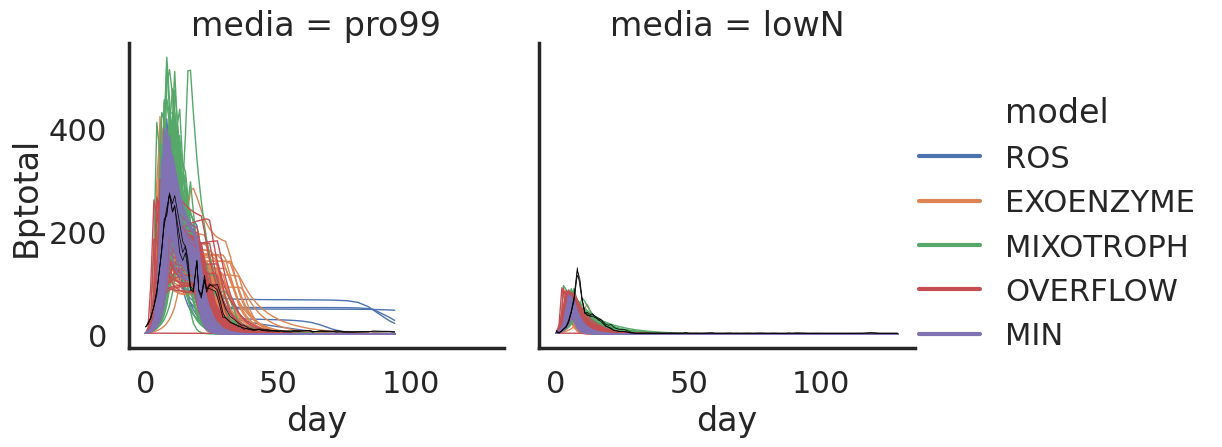

In [20]:
g = sns.relplot(
    data=vprodf.loc[~vprodf.run_id.isin(negative_run_ids)], x='day', y='Bptotal',
    units='run_id', estimator=None,
     kind='line',
    hue='model', col='media', lw=1,
)
for col_val, ax in g.axes_dict.items():
    datadf = refdf if col_val == 'lowN' else refp99df
    sns.lineplot(data=datadf, x='day', y='ref_Bp',
    units='Sample', estimator=None, ax=ax, lw=0.5, color='black',
                 
                 legend=False
                )


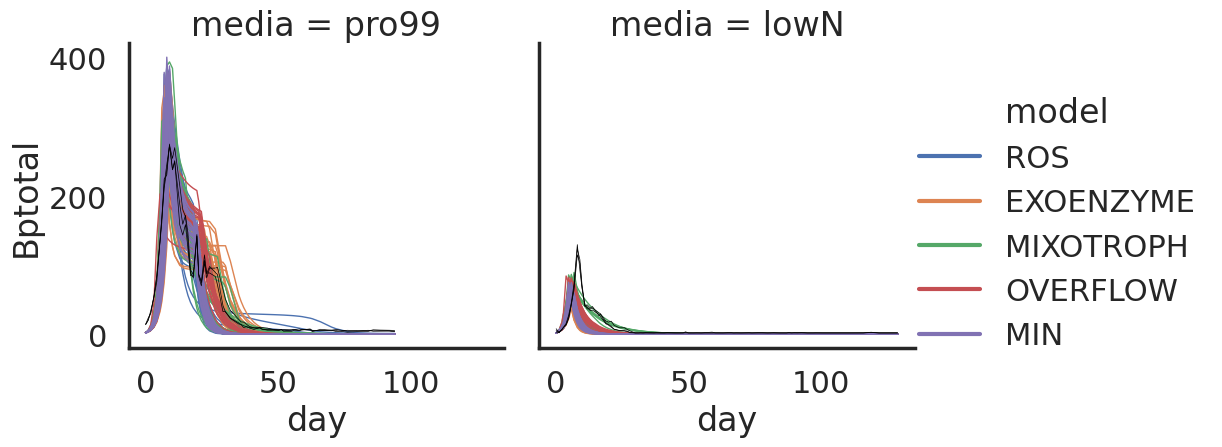

In [32]:
lowerror_ids = vpromse_df.loc[
    ~vpromse_df.run_id.isin(negative_run_ids) & 
     vpromse_df.media.isin(['pro99']) &
     (vpromse_df.RMSE < 40), 'vpro'].unique()

g = sns.relplot(
    data=vprodf.loc[vprodf.vpro.isin(lowerror_ids)], 
    x='day', y='Bptotal',
    units='run_id', estimator=None,
     kind='line',
    hue='model', col='media', lw=1,
)
for col_val, ax in g.axes_dict.items():
    datadf = refdf if col_val == 'lowN' else refp99df
    sns.lineplot(data=datadf, x='day', y='ref_Bp',
    units='Sample', estimator=None, ax=ax, lw=0.5, color='black',
                 
                 legend=False
                )


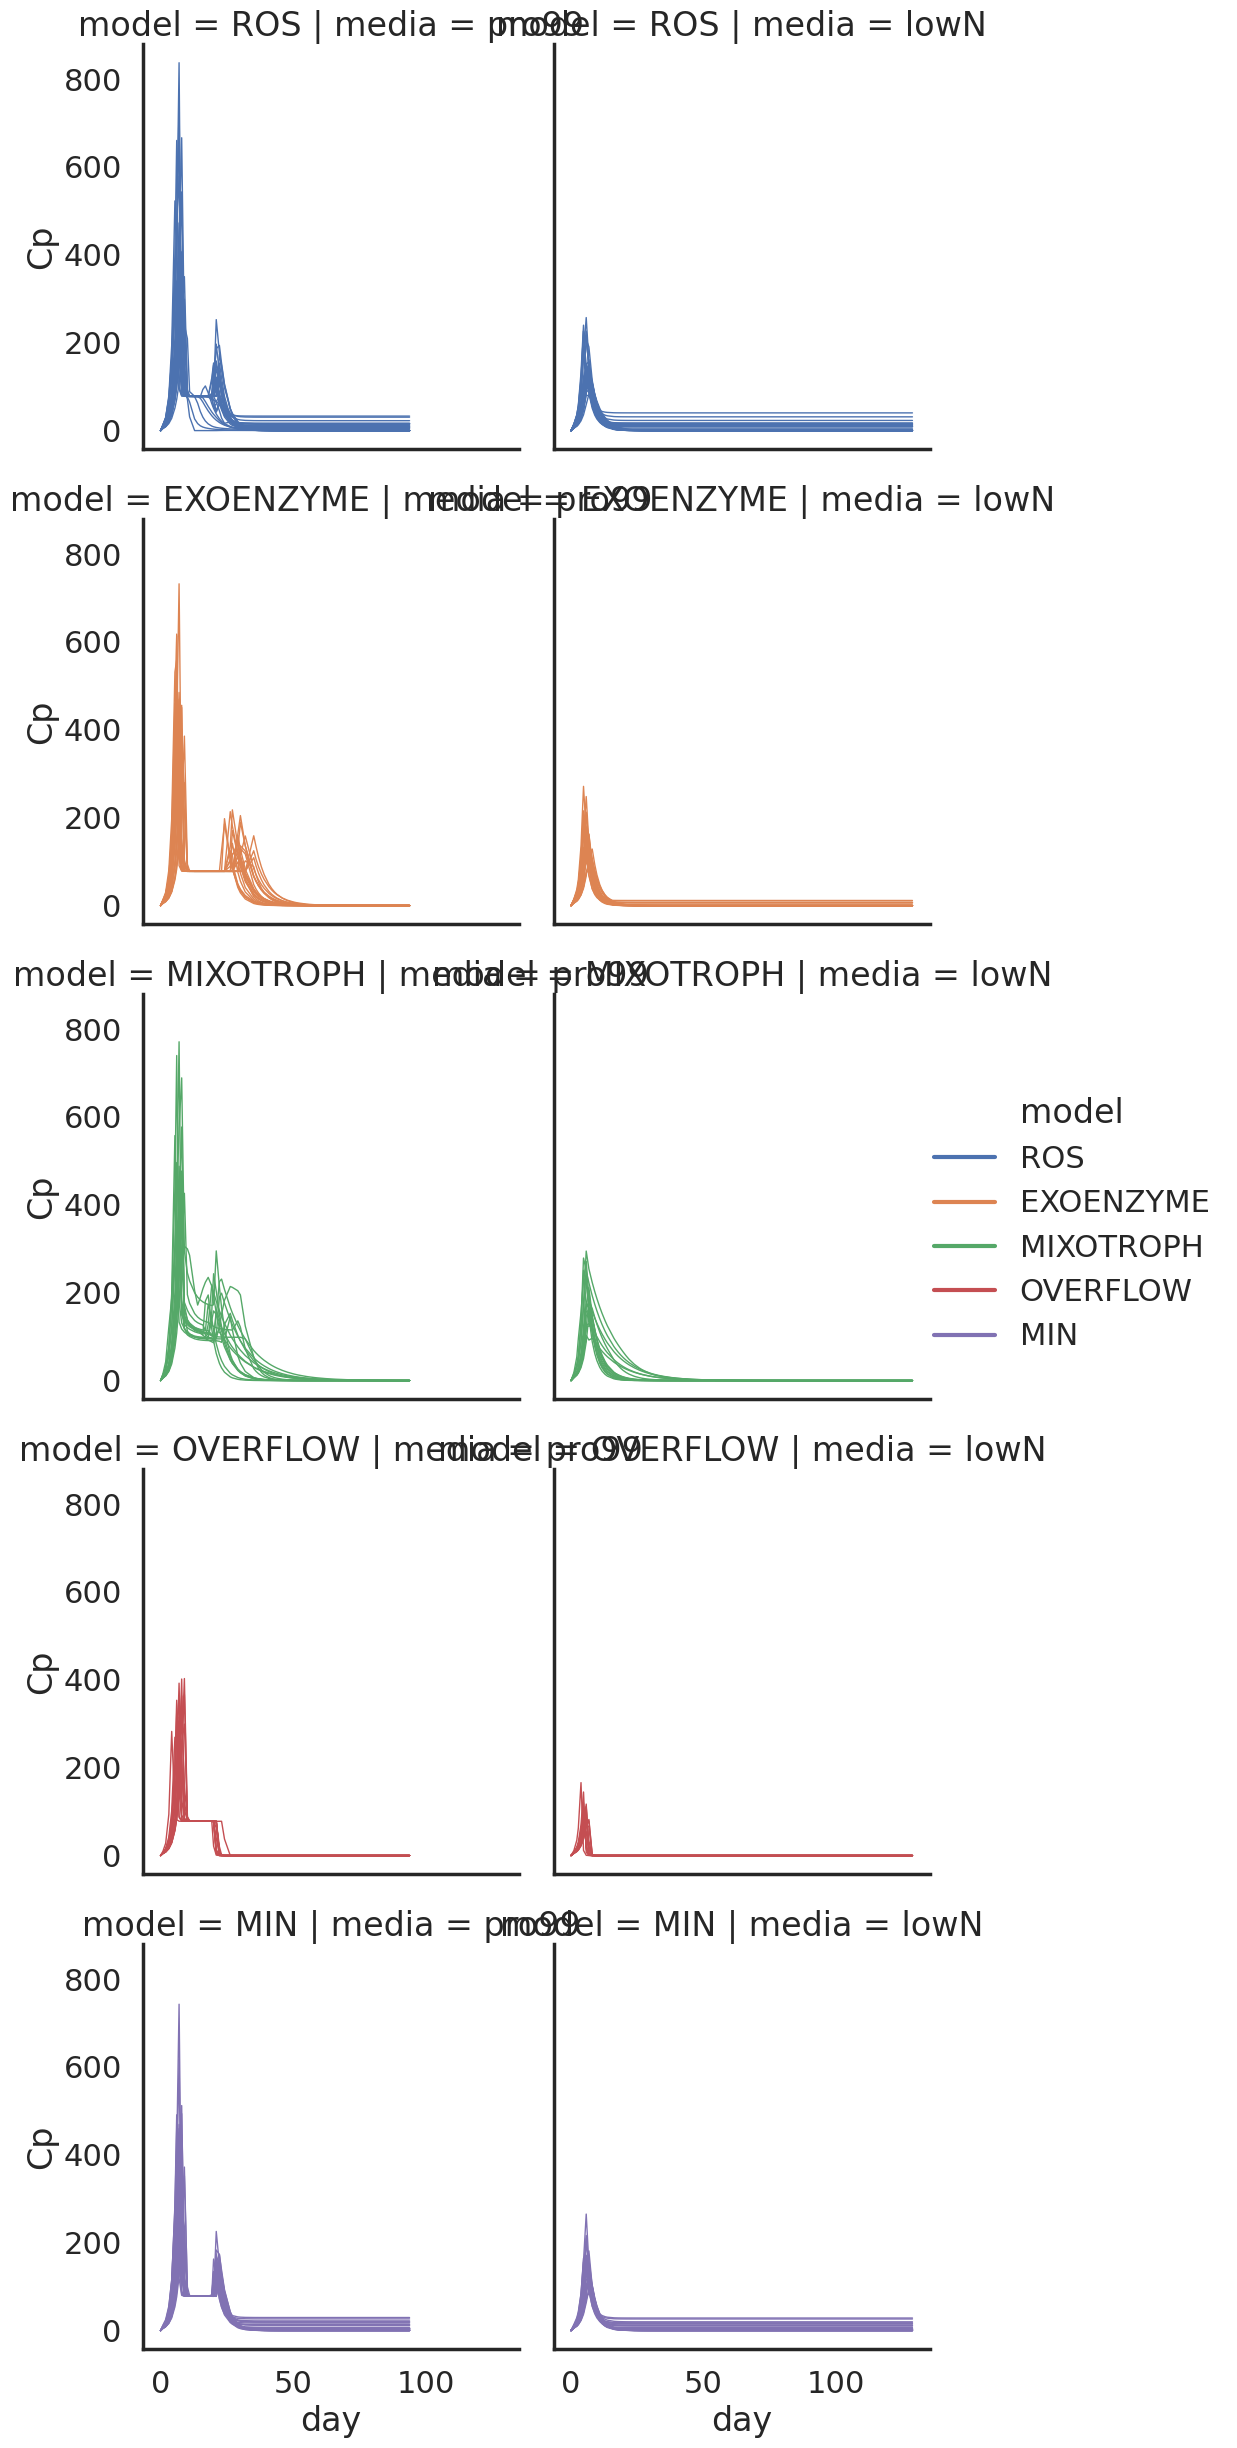

In [41]:

g = sns.relplot(
    data=vprodf.loc[vprodf.vpro.isin(lowerror_ids)], 
    x='day', y='Cp',
    units='run_id', estimator=None,
     kind='line',
    hue='model', col='media', lw=1, row='model',
)# .set(ylim=(0,100))


In [44]:
vprodf.columns

Index(['Bp', 'Np', 'Cp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS',
       't', 'day', 'gross_uptakeINp', 'gross_uptakeONp', 'gross_uptakeICp',
       'gross_uptakeOCp', 'uptakeNp', 'uptakeCp', 'QCp', 'biosynthesisNp',
       'respirationCp', 'biomass_breakdownCp', 'overflowNp', 'overflowCp',
       'Bp[C]', 'Bptotal', 'Bptotal[C]', 'run_id', 'media', 'mode', 'run',
       'model', 'vpro'],
      dtype='object')

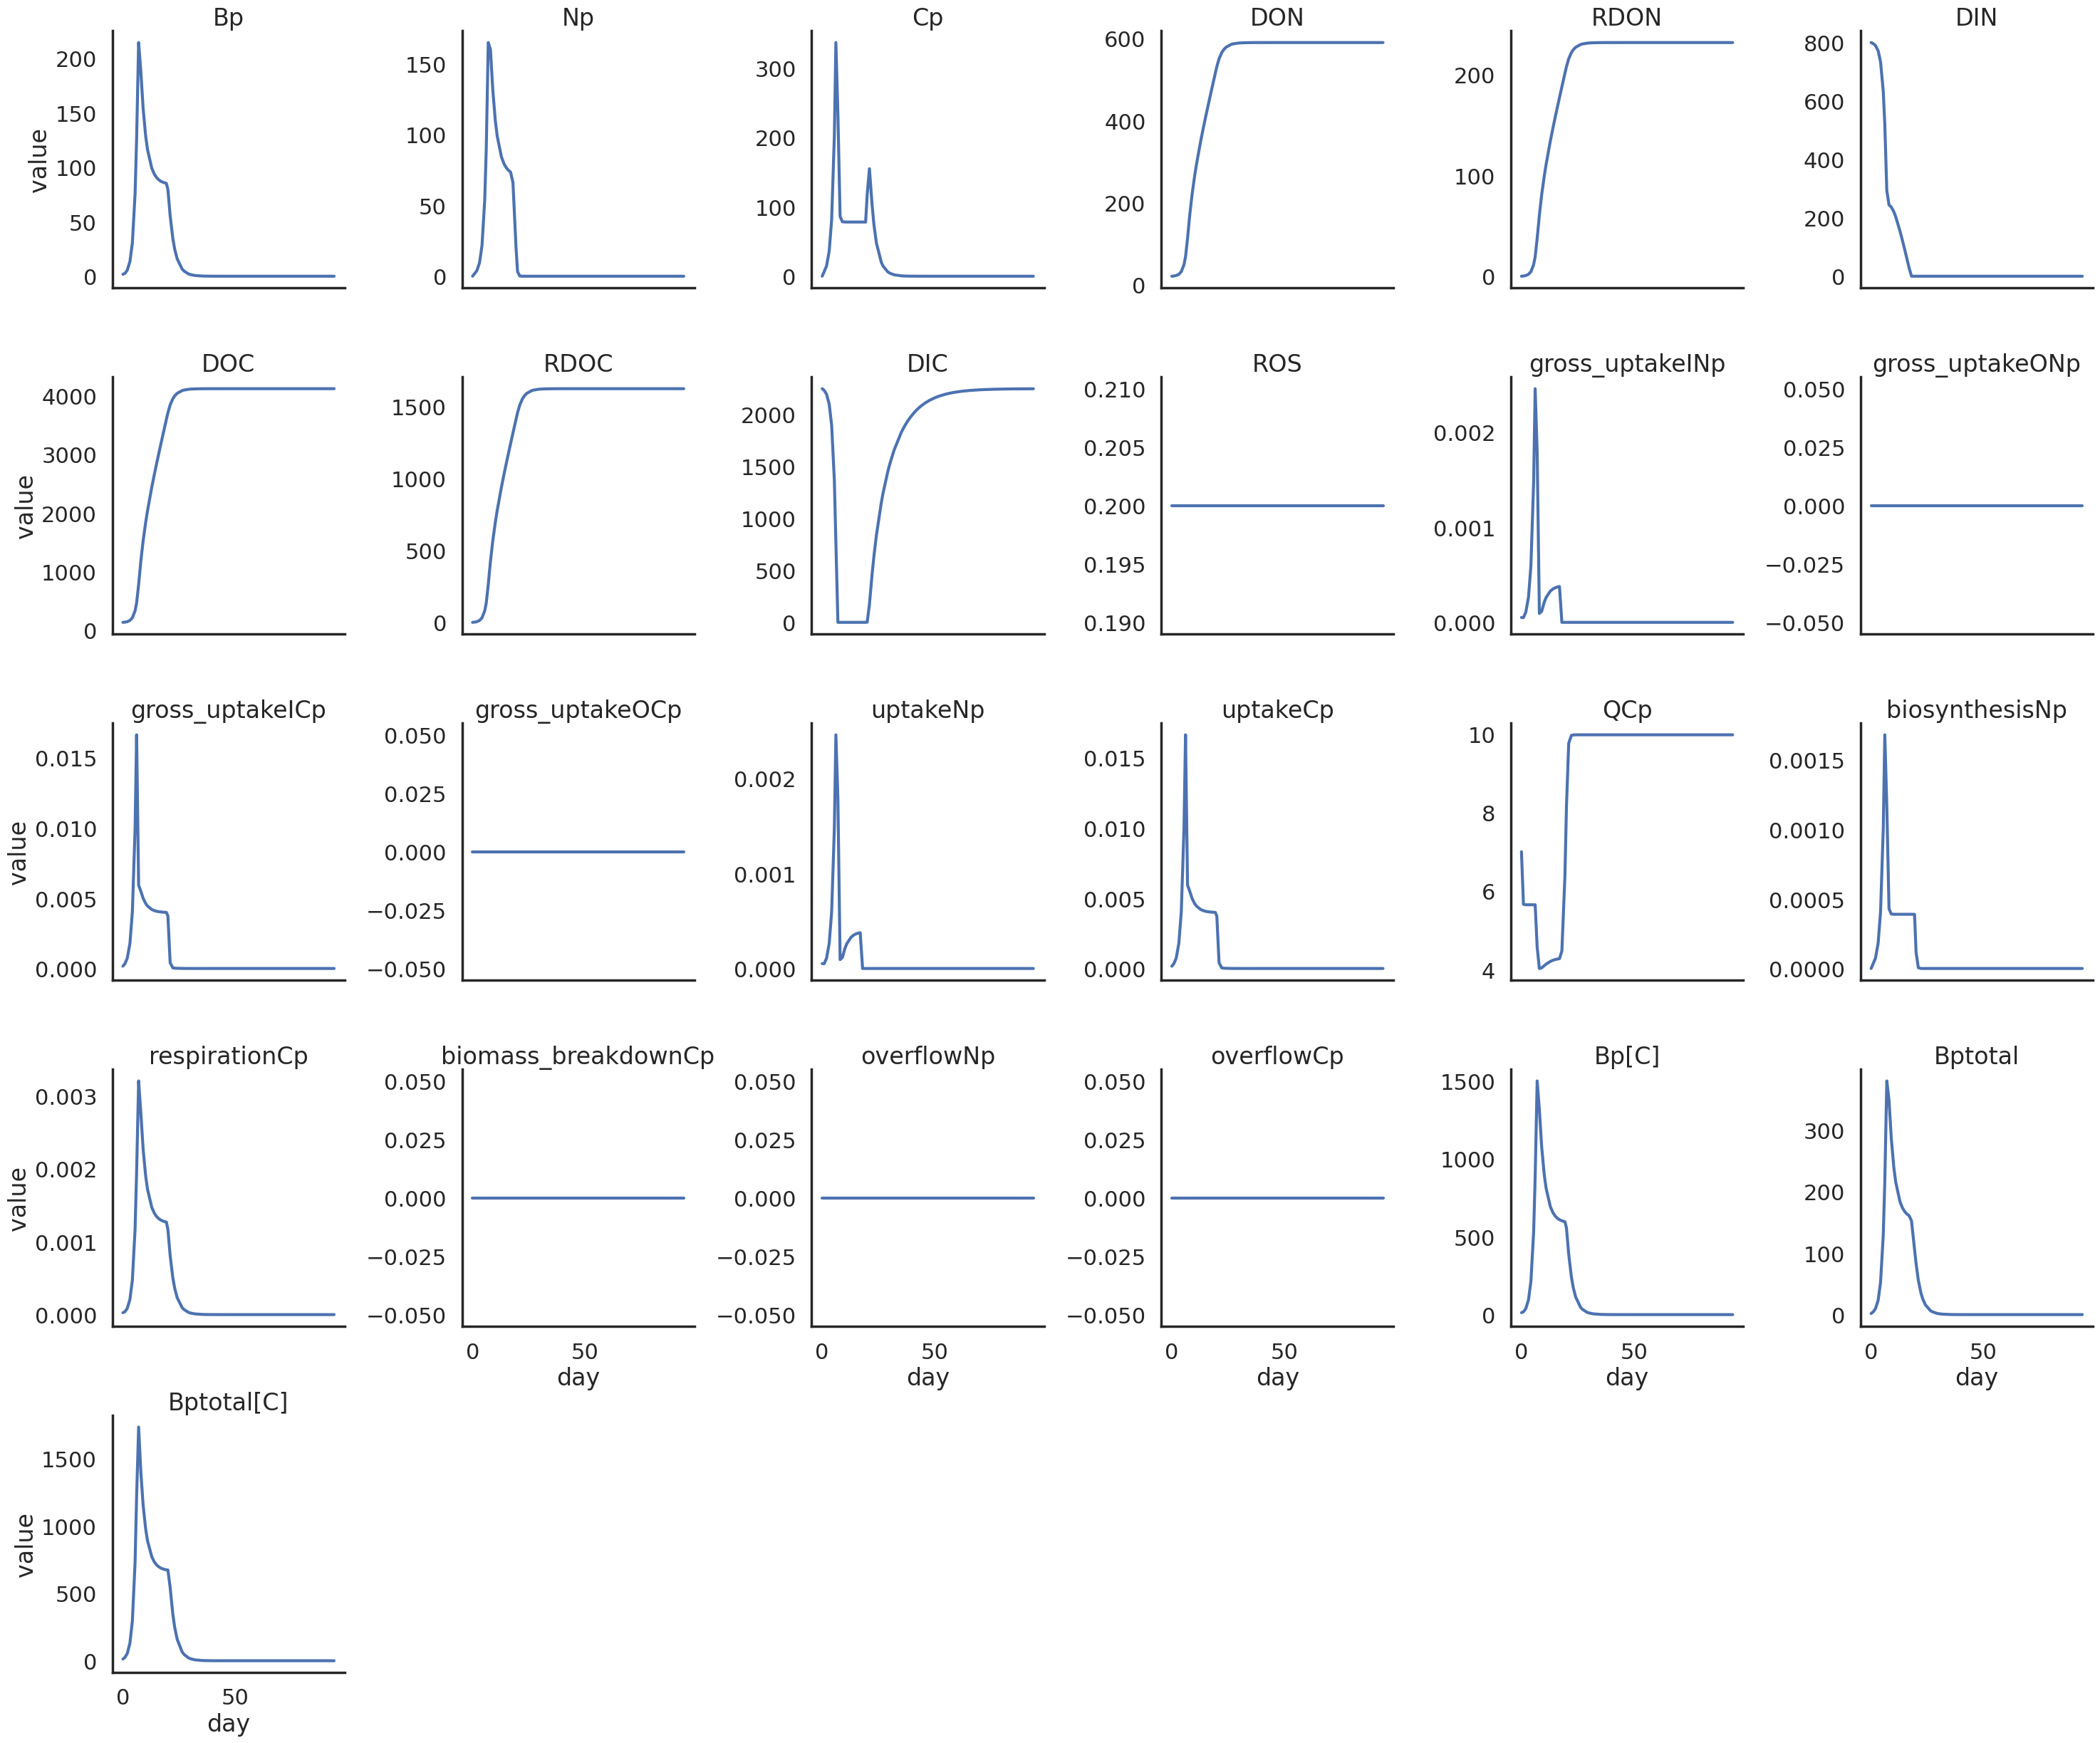

In [50]:
sns.relplot(
    data=vprodf.loc[
        vprodf.vpro.isin(['MIN_27'])& 
        vprodf.media.isin(['pro99'])
    ].melt(id_vars = [ 't', 'day','run_id', 'media', 'mode', 'run','model', 'vpro']),
    x='day', y='value', col='variable', facet_kws=dict(sharey=False),
    kind='line', col_wrap=6,
           ).set_titles(col_template='{col_name}')

In [34]:
vprodf.columns

Index(['Bp', 'Np', 'Cp', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC', 'ROS',
       't', 'day', 'gross_uptakeINp', 'gross_uptakeONp', 'gross_uptakeICp',
       'gross_uptakeOCp', 'uptakeNp', 'uptakeCp', 'QCp', 'biosynthesisNp',
       'respirationCp', 'biomass_breakdownCp', 'overflowNp', 'overflowCp',
       'Bp[C]', 'Bptotal', 'Bptotal[C]', 'run_id', 'media', 'mode', 'run',
       'model', 'vpro'],
      dtype='object')

In [31]:
vpromse_df.loc[
    ~vpromse_df.run_id.isin(negative_run_ids) & 
     vpromse_df.media.isin(['pro99']) &
     (vpromse_df.RMSE < 40), 'RMSE'].describe()

count    318.000000
mean      34.364726
std        3.894838
min       23.580940
25%       31.533755
50%       35.059390
75%       37.727167
max       39.992514
Name: RMSE, dtype: float64

In [29]:
lowerror_ids

array(['ROS_5', 'MIN_12', 'EXOENZYME_15', 'MIXOTROPH_8', 'ROS_18',
       'MIN_27', 'ROS_15', 'MIN_4', 'MIXOTROPH_28', 'EXOENZYME_43',
       'EXOENZYME_50', 'MIN_10', 'MIXOTROPH_4', 'MIN_0', 'OVERFLOW_4',
       'MIXOTROPH_5', 'MIXOTROPH_3', 'EXOENZYME_24', 'MIN_15', 'ROS_40',
       'MIXOTROPH_21', 'EXOENZYME_12', 'MIN_6', 'ROS_29', 'OVERFLOW_9',
       'MIN_34', 'ROS_26', 'OVERFLOW_6', 'EXOENZYME_11', 'EXOENZYME_1',
       'ROS_37', 'EXOENZYME_13', 'OVERFLOW_11', 'ROS_11', 'ROS_33',
       'EXOENZYME_9', 'MIN_23', 'MIXOTROPH_11', 'ROS_38', 'OVERFLOW_8',
       'MIN_32', 'ROS_2', 'ROS_50', 'OVERFLOW_40', 'MIN_17', 'ROS_27',
       'ROS_10', 'OVERFLOW_2', 'MIXOTROPH_19', 'ROS_1', 'ROS_20',
       'MIN_18', 'ROS_14', 'MIN_9', 'ROS_17', 'MIN_41', 'MIN_13',
       'OVERFLOW_12', 'EXOENZYME_2', 'MIN_40', 'EXOENZYME_26', 'MIN_8',
       'EXOENZYME_17', 'MIN_2', 'ROS_16', 'MIN_16', 'ROS_13',
       'MIXOTROPH_16', 'ROS_23', 'MIXOTROPH_1', 'MIN_24', 'EXOENZYME_16',
       'ROS_45', 'EXOENZYM

In [175]:
vpromse_df.loc[~vpromse_df.run_id.isin(negative_run_ids)].groupby(['media', 'model'
                                                                  ])['RMSE'].describe()


count       mean        std        min        25%        50%  \
media model                                                                     
lowN  EXOENZYME  129.0  19.577795   2.429264  14.291056  17.800365  19.845343   
      MIN        111.0  18.996998   1.942471  14.791042  17.684294  19.116121   
      MIXOTROPH  141.0  14.477864   2.806381   9.342429  12.232910  14.143957   
      OVERFLOW   117.0  16.843258   3.794216   9.057984  14.039432  16.581645   
      ROS        117.0  18.351268   2.412508  11.210354  17.240432  18.453114   
pro99 EXOENZYME  147.0  43.114084  12.765765  23.580940  33.541777  42.779922   
      MIN        135.0  39.161681   4.471145  30.945093  36.033593  38.389392   
      MIXOTROPH  144.0  49.964390  16.558499  24.464693  37.520228  51.567224   
      OVERFLOW   117.0  44.937167  12.434688  26.493968  37.071459  43.530075   
      ROS        147.0  39.566841   6.020810  27.856614  34.840153  39.357049   

                       75%         max  
media model                             
lowN  EXOENZYME  21.233585   24.246427  
      MIN        20.381644   23.060351  
      MIXOTROPH  16.830656   20.275459  
      OVERFLOW   18.955036   24.999127  
      ROS        20.249420   23.080328  
pro99 EXOENZYME  50.290946  100.895982  
      MIN        41.789527   50.505868  
      MIXOTROPH  59.655006  124.398177  
      OVERFLOW   51.907986   99.099190  
      ROS        43.452358   59.586144

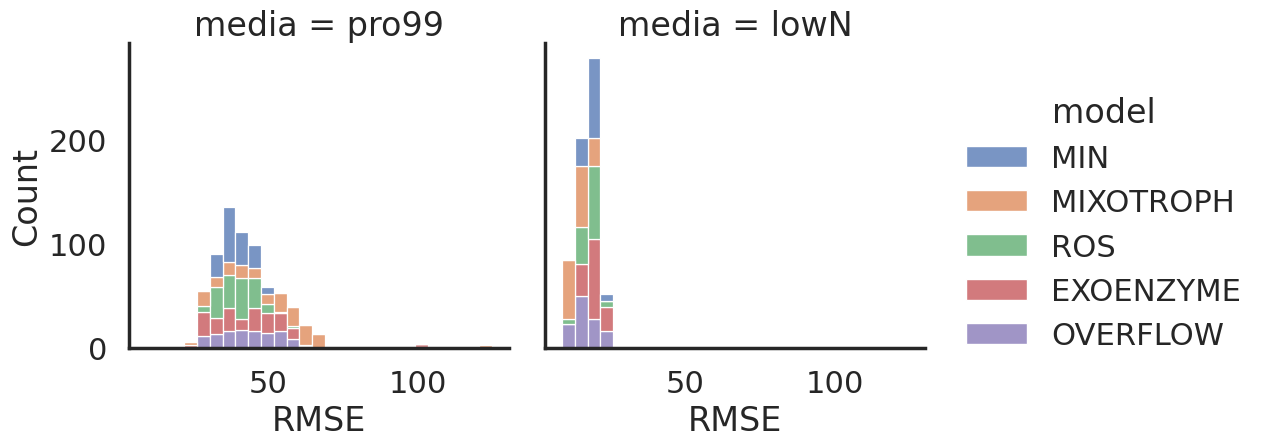

In [163]:
g = sns.displot(
    data=vpromse_df.loc[~vpromse_df.run_id.isin(negative_run_ids)], x='RMSE', 
    hue='model', col='media', lw=1, #fill=None,
    multiple='stack',
)


In [164]:
mse_df[['media', 'run']].value_counts()

media  run        
lowN   sensitivity    2508
pro99  sensitivity      30
dtype: int64

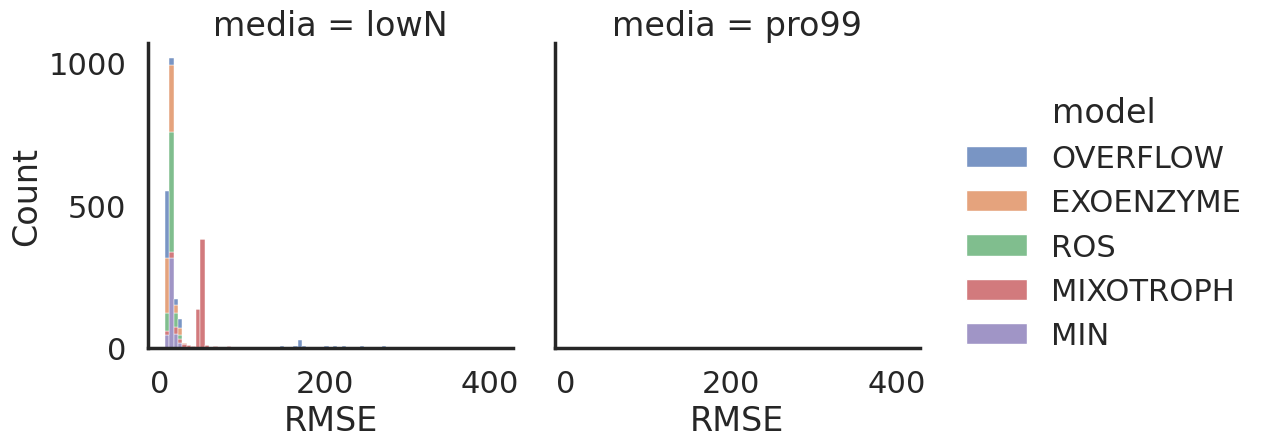

In [116]:
g = sns.displot(
    data=mse_df, x='RMSE', 
    hue='model', col='media', lw=1, #fill=None,
    multiple='stack',
)


In [108]:
vprosum_df.columns

Index(['Mh', 'Mp', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'E_leakp', 'E_leakh',
       'KONp', 'KINp', 'KOCp', 'KICp', 'KONh', 'KINh', 'KOCh', 'KICh',
       'VmaxONp', 'VmaxINp', 'VmaxOCp', 'VmaxICp', 'VmaxONh', 'VmaxINh',
       'VmaxOCh', 'VmaxICh', 'OverflowMode', 'E_ROSp', 'E_ROSh', 'VmaxROSh',
       'K_ROSh', 'ROS_decay', 'KABp', 'KABh', 'EABp', 'EABh', 'decayABh',
       'decayABp', 'MABp', 'MABh', 'r0p', 'r0h', 'bp', 'bh', 'QNmaxp',
       'QNminp', 'QNmaxh', 'QNminh', 'Kmtbp', 'Kmtbh', 'gamma_DON2DINp',
       'gamma_DON2DINh', 'QCmaxp', 'QCminp', 'QCmaxh', 'QCminh', 'ROSMode',
       'omegaP', 'omegaH', 'run_id', 'media', 'mode', 'run', 'model', 'vpro'],
      dtype='object')

In [ ]:
param_values_df = vprosum_df.melt(id_vars=['run_id', 'model'], value_vars=params_list, var_name='sen_param', value_name='sen_param_value')

In [168]:
vprosum_df.Mp.describe()

count    4.660000e+02
mean     2.700472e-06
std      1.588401e-06
min      2.320940e-07
25%      1.248512e-06
50%      2.669720e-06
75%      3.886573e-06
max      5.783446e-06
Name: Mp, dtype: float64

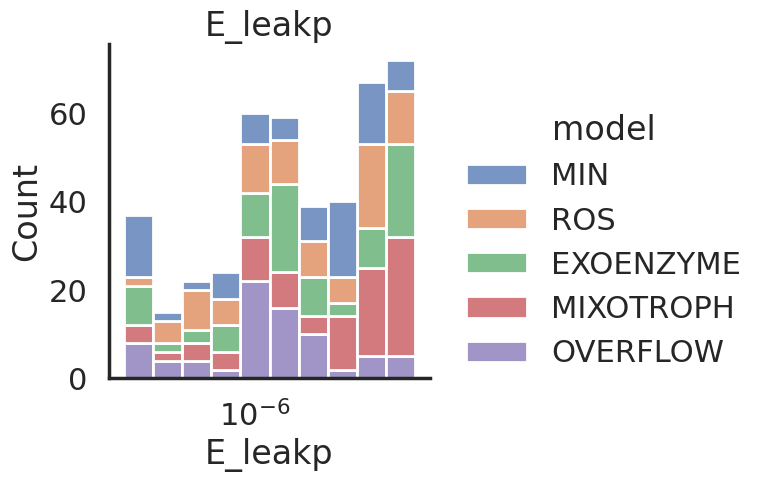

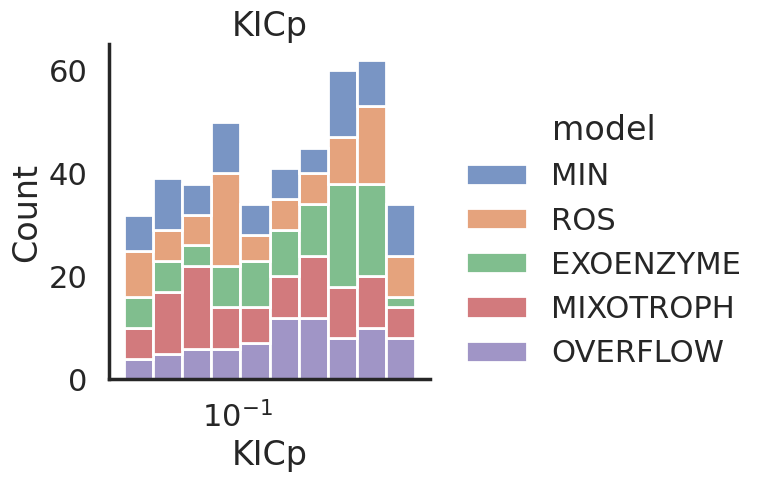

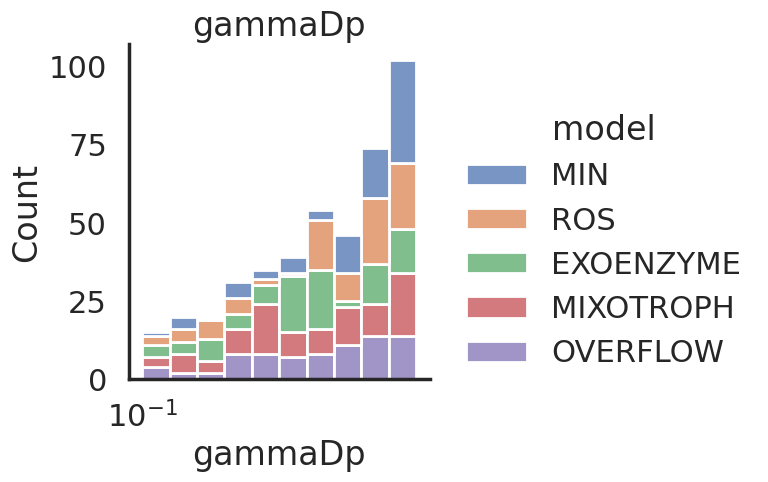

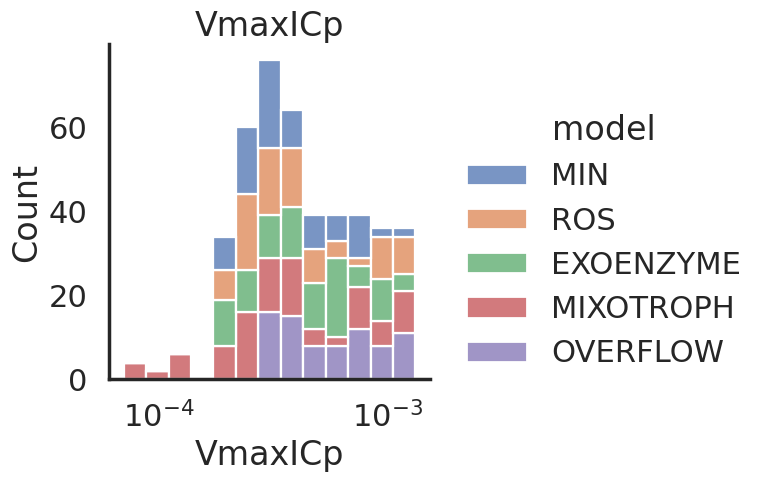

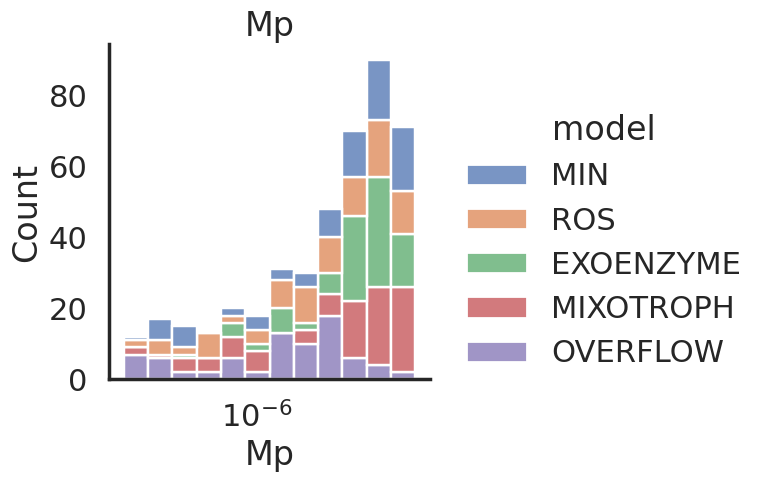

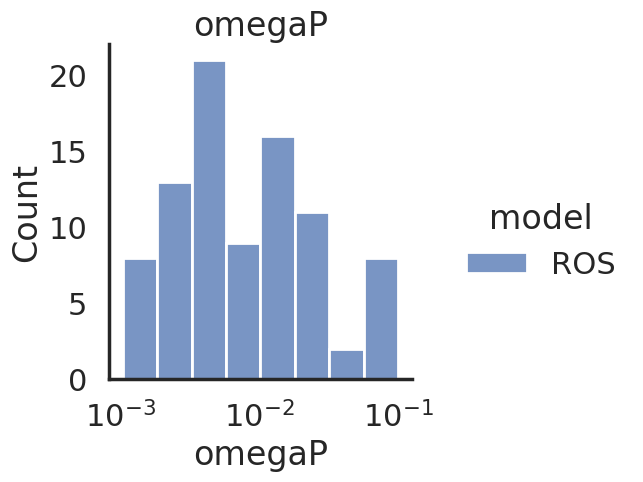

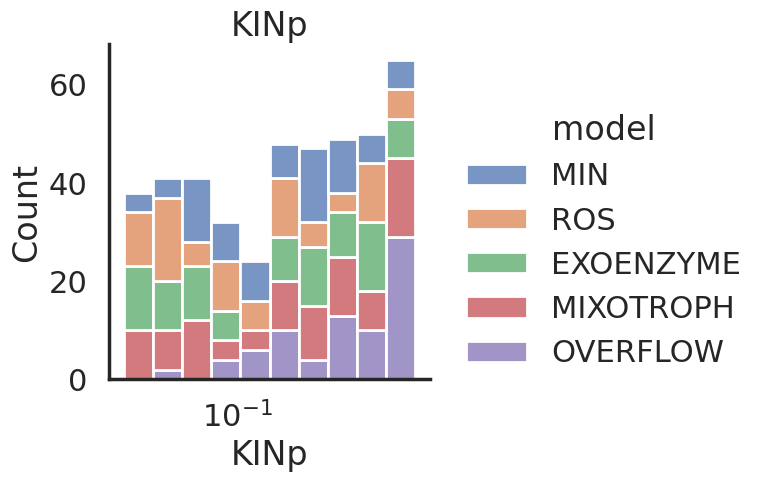

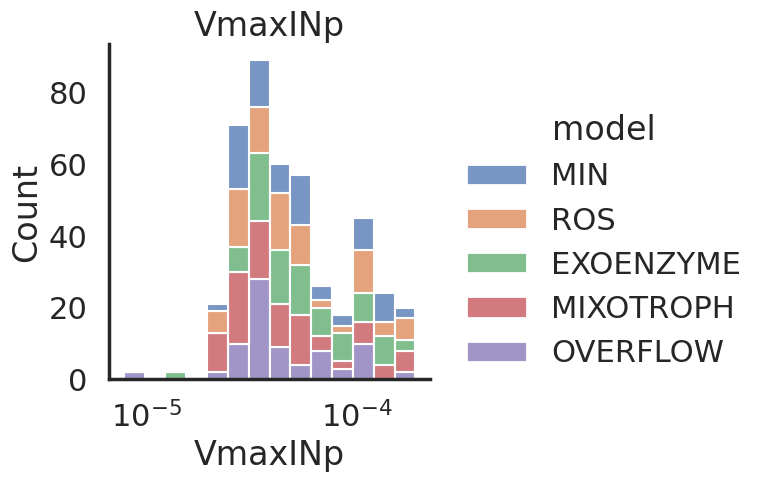

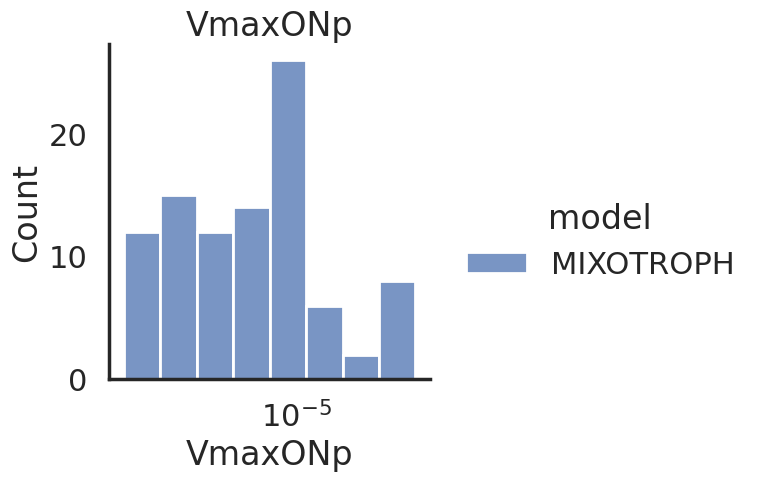

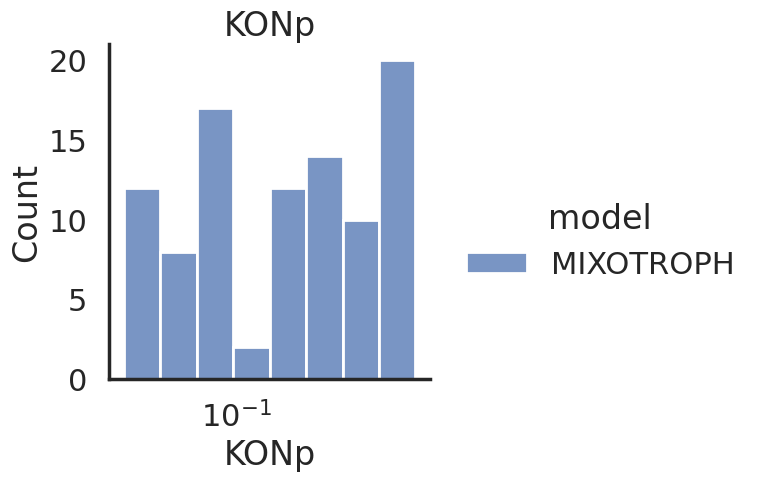

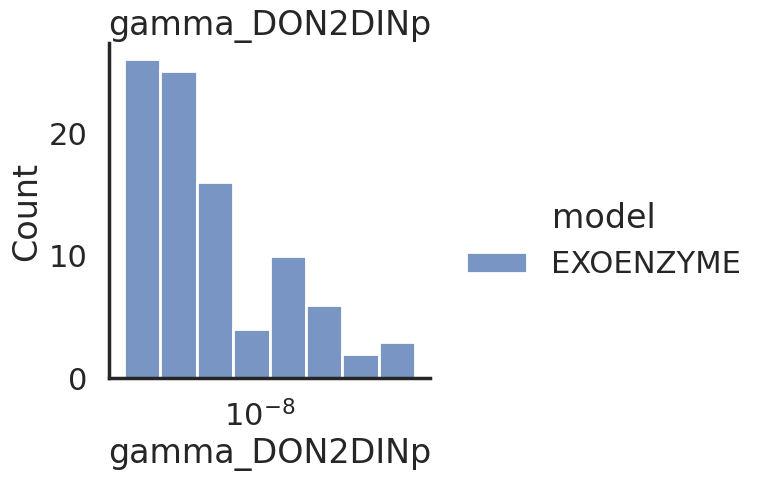

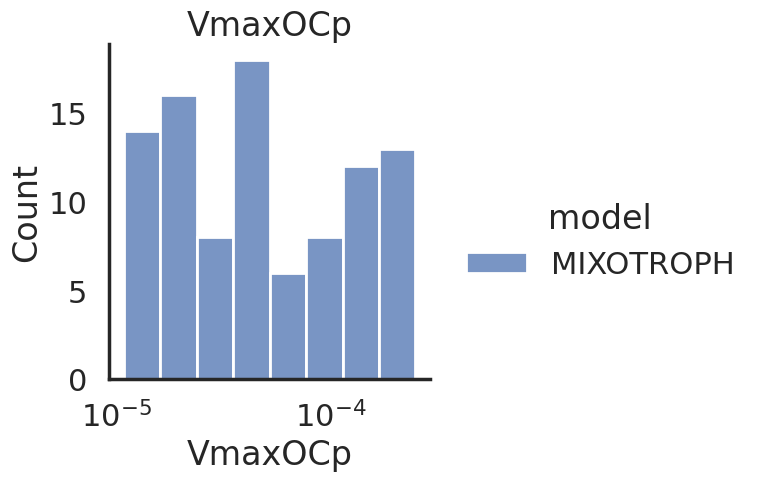

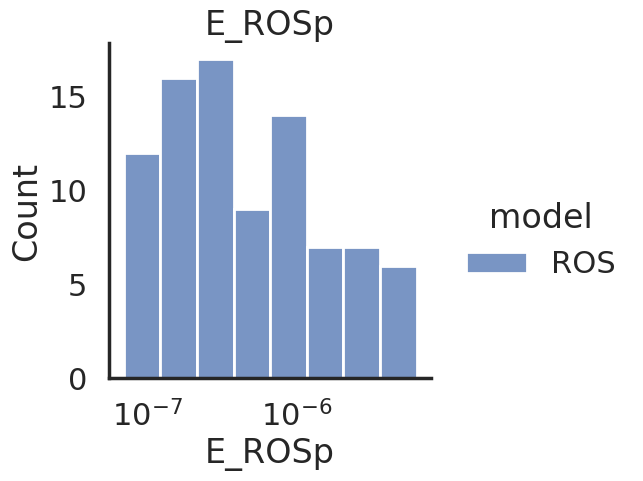

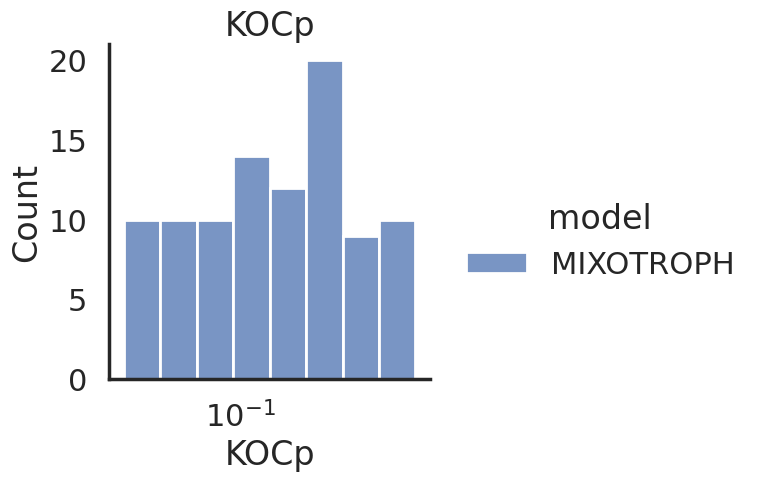

In [171]:
for i in params_list:
    if i == 'Mp':
        next
    model_list = senparams.loc[senparams.param.isin([i]), 'model'].unique()    
    g = sns.displot(
        data=vprosum_df.loc[~vprosum_df.run_id.isin(negative_run_ids) & vprosum_df.model.isin(model_list)], 
        x=i, 
        hue='model', log_scale=True,
        #fill=None,
        multiple='stack',
    ).set(title=i)
    


In [104]:
vprodf.run_id.value_counts()

vpro_ponly_lsq_ponly_OVERFLOW_4_lowN_ponly_OVERFLOW_h6911532492428187790       74
vpro_ponly_lsq_ponly_MIXOTROPH_4_lowN_ponly_MIXOTROPH_h9062214567168307495     74
vpro_ponly_lsq_ponly_EXOENZYME_3_lowN_ponly_EXOENZYME_h-5932501020458258679    74
vpro_ponly_lsq_ponly_ROS_0_lowN_ponly_ROS_h-6911592851287142628                74
vpro_ponly_lsq_ponly_EXOENZYME_0_lowN_ponly_EXOENZYME_h-4836759071358855406    74
                                                                               ..
vpro_ponly_lsq_ponly_ROS_10_pro99_ponly_ROS_h8254294819498591591               58
vpro_ponly_lsq_ponly_OVERFLOW_9_pro99_ponly_OVERFLOW_h-7981256578886166171     58
vpro_ponly_lsq_ponly_MIN_4_pro99_ponly_MIN_h8486317914065148453                58
vpro_ponly_lsq_ponly_MIXOTROPH_3_pro99_ponly_MIXOTROPH_h4288787092895066845    58
vpro_ponly_lsq_ponly_ROS_6_pro99_ponly_ROS_h-3013298379391810910               58
Name: run_id, Length: 100, dtype: int64

# baseline and vpro dfs

In [26]:
basedf.run_id.unique()

array(['baseline_ponly_FULL', 'baseline_ponly_LEAK',
       'baseline_ponly_MIXO', 'baseline_ponly_MIN'], dtype=object)

In [27]:
vprodf[['idx', 'model', 'f_scale']] = vprodf.run_id.str.split('_', expand=True)[[0,4,5]]
vpromse_df[['idx', 'model', 'f_scale']] = vpromse_df.run_id.str.split('_', expand=True)[[0,4,5]]
vprosum_df[['idx', 'model', 'f_scale']] = vprosum_df.run_id.str.split('_', expand=True)[[0,4,5]]


In [28]:
vpromse_df.idx.unique()

array(['vpro'], dtype=object)

In [29]:
basedf[['idx', 'model']] = basedf.run_id.str.split('_', expand=True)[[0,2]]
basemse_df[['idx',  'model']] = basemse_df.run_id.str.split('_', expand=True)[[0,2]]
basesum_df[['idx',  'model']] = basesum_df.run_id.str.split('_', expand=True)[[0,2]]


In [30]:
basemse_df.idx.unique()

array(['baseline'], dtype=object)

In [31]:
basedf = pd.concat([basedf, vprodf], ignore_index=True)
basemse_df = pd.concat([basemse_df, vpromse_df], ignore_index=True)
basesum_df = pd.concat([basesum_df, vprosum_df], ignore_index=True)


In [32]:
basemse_df.idx.unique()

array(['baseline', 'vpro'], dtype=object)

In [33]:
basemse_df.run_id.value_counts()

baseline_ponly_FULL                  3
vpro_ponly_least_square_MIXO_1       3
vpro_ponly_least_square_LEAK_0.1     3
vpro_ponly_least_square_LEAK_0.01    3
vpro_ponly_least_square_MIN_0.01     3
vpro_ponly_least_square_MIXO_0.1     3
vpro_ponly_least_square_MIN_10       3
vpro_ponly_least_square_MIXO_10      3
vpro_ponly_least_square_LEAK_20      3
vpro_ponly_least_square_MIN_20       3
vpro_ponly_least_square_MIXO_20      3
baseline_ponly_MIXO                  3
vpro_ponly_least_square_LEAK_10      3
vpro_ponly_least_square_MIXO_100     3
vpro_ponly_least_square_MIN_1        3
vpro_ponly_least_square_MIN_0.1      3
vpro_ponly_least_square_LEAK_100     3
vpro_ponly_least_square_MIN_100      3
baseline_ponly_LEAK                  3
baseline_ponly_MIN                   3
vpro_ponly_least_square_LEAK_1       3
Name: run_id, dtype: int64

In [34]:
basemse_df.head()

,Sample,full name,Group,compare_points,MSE,run_id,idx,model,f_scale
0,1A0,Axenic,Axenic,74.0,795.229319,baseline_ponly_FULL,baseline,FULL,NaN
1,1B0,Axenic,Axenic,74.0,836.147406,baseline_ponly_FULL,baseline,FULL,NaN
2,1C0,Axenic,Axenic,74.0,877.345874,baseline_ponly_FULL,baseline,FULL,NaN
3,1A0,Axenic,Axenic,74.0,796.898222,baseline_ponly_MIXO,baseline,MIXO,NaN
4,1B0,Axenic,Axenic,74.0,836.919813,baseline_ponly_MIXO,baseline,MIXO,NaN


In [35]:
basesum_df.head()

,Mh,Mp,gammaDp,gammaDh,Rp,Rh,EOp,EIp,EOh,EIh,...,MABp,MABh,r0p,r0h,bp,bh,run_id,idx,model,f_scale
0,0.000001,0.000001,0.600000,0.6,7.0,4.5,0.000000e+00,0.0,0.000000,0.0,...,0.000000e+00,0.000000e+00,0.000002,0.000002,0.01,0.01,baseline_ponly_MIN,baseline,MIN,NaN
1,0.000001,0.000001,0.600000,0.6,7.0,4.5,1.157407e-06,0.0,0.000001,0.0,...,0.000000e+00,0.000000e+00,0.000002,0.000002,0.01,0.01,baseline_ponly_MIXO,baseline,MIXO,NaN
2,0.000001,0.000001,0.600000,0.6,7.0,4.5,1.157407e-06,0.0,0.000001,0.0,...,1.157407e-07,1.157407e-07,0.000002,0.000002,0.01,0.01,baseline_ponly_FULL,baseline,FULL,NaN
3,0.000001,0.000001,0.600000,0.6,7.0,4.5,1.157407e-06,0.0,0.000001,0.0,...,0.000000e+00,0.000000e+00,0.000002,0.000002,0.01,0.01,baseline_ponly_LEAK,baseline,LEAK,NaN
4,0.000001,0.000003,0.198338,0.6,7.0,4.5,4.007643e-07,0.0,0.000001,0.0,...,0.000000e+00,0.000000e+00,0.000002,0.000002,0.01,0.01,vpro_ponly_least_square_MIXO_0.1,vpro,MIXO,0.1


In [36]:
basedf.head()

,Bp,DON,RDON,DIN,DOC,RDOC,DIC,ROS,ABp,ABh,t,day,Bp[C],ABp[C],ABh[C],run_id,idx,model,f_scale
0,1.785714,20.000000,0.000000,100.000000,132.500000,0.000000,2241.552301,0.200000,0.000000e+00,0.0,0.0,0.000000,12.500000,0.000000e+00,0.0,baseline_ponly_FULL,baseline,FULL,NaN
1,3.257973,36.610271,0.105979,81.811491,132.548429,0.741854,2231.004986,0.345498,1.476506e-11,0.0,93480.0,1.081944,22.805810,1.033554e-10,0.0,baseline_ponly_FULL,baseline,FULL,NaN
2,5.934351,66.827346,0.299304,48.724713,132.647703,2.095129,2212.952593,0.611118,4.154007e-11,0.0,187020.0,2.164583,41.540454,2.907805e-10,0.0,baseline_ponly_FULL,baseline,FULL,NaN
3,8.183333,92.203476,0.462430,20.936475,132.742434,3.237008,2198.156240,0.835315,6.407347e-11,0.0,237360.0,2.747222,57.283332,4.485143e-10,0.0,baseline_ponly_FULL,baseline,FULL,NaN
4,14.207659,106.671611,0.902467,0.003978,133.047851,6.317266,2159.084417,1.440189,1.247558e-10,0.0,324360.0,3.754167,99.453612,8.732904e-10,0.0,baseline_ponly_FULL,baseline,FULL,NaN


In [37]:
mse_df.columns

Index(['Sample', 'full name', 'Group', 'compare_points', 'MSE', 'run_id',
       'sen_param_model', 'idx', 'model', 'sen_param', 'sen_param_value'],
      dtype='object')

In [60]:
mse_df = pd.concat([mse_df, vpromse_df])
df = pd.concat([df, vprodf])
sum_df = pd.concat([sum_df, vprosum_df])

In [38]:
params_list = ['Mh', 'Mp', 'gammaDp', 'gammaDh', 'Rp', 'Rh', 'EOp',
       'EIp', 'EOh', 'EIh', 'KONp', 'KINp', 'KOCp', 'KICp', 'KONh', 'KINh',
       'KOCh', 'KICh', 'VmaxONp', 'VmaxINp', 'VmaxOCp', 'VmaxICp', 'VmaxONh',
       'VmaxINh', 'VmaxOCh', 'VmaxICh', 'Oh', 'Op', 'E_ROSp', 'E_ROSh',
       'VmaxROSh', 'K_ROSh', 'omegaP', 'omegaH', 'ROS_decay', 'KABp', 'KABh',
       'EABp', 'EABh', 'decayABh', 'decayABp', 'MABp', 'MABh', 'r0p', 'r0h',
       'bp', 'bh',]
baseparam_values_df = basesum_df.melt(id_vars='run_id', value_vars=params_list, var_name='sen_param', value_name='sen_param_value')

In [39]:
basemse_df = pd.merge(basemse_df, baseparam_values_df, on=['run_id'], how='left')

In [40]:
basemse_df.idx.value_counts()

vpro        2397
baseline     564
Name: idx, dtype: int64

In [41]:
basemse_df = basemse_df.loc[
    (basemse_df.model.isin(['MIN']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['MIN']),'sen_param'])) |
    (basemse_df.model.isin(['LEAK']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['LEAK']),'sen_param'])) |
    (basemse_df.model.isin(['MIXO']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['MIXO']),'sen_param'])) |
    (basemse_df.model.isin(['FULL']) & basemse_df.sen_param.isin(mse_df.loc[mse_df.model.isin(['FULL']),'sen_param'])) 
]

In [42]:
basemse_df.idx.value_counts()

vpro        399
baseline    126
Name: idx, dtype: int64

In [43]:
mse_df = pd.concat([mse_df, basemse_df],ignore_index=True )

In [44]:
sum_df.model.unique(), sum_df.sen_param.unique(), sum_df.idx.unique(), 

(array(['MIXO', 'FULL', 'LEAK', 'MIN'], dtype=object),
 array(['KINp', 'KONp', 'VmaxINp', 'gammaDp', 'omegaP', 'decayABp', 'KABp',
        'MABp', 'EOp', 'VmaxOCp', 'VmaxONp', 'E_ROSp', 'KOCp', 'KICp',
        'VmaxICp', 'Mp', 'EABp', 'ROS_decay'], dtype=object),
 array(['0', '9', '4', '16', '11', '17', '7', '13', '19', '12', '2', '14',
        '15', '5', '3', '1', '8', '6', '18', '10'], dtype=object))

In [45]:
mse_df.model.unique(), mse_df.sen_param.unique(),mse_df.idx.unique(), 

(array(['MIXO', 'FULL', 'MIN', 'LEAK'], dtype=object),
 array(['KOCp', 'KICp', 'VmaxONp', 'KABp', 'omegaP', 'EABp', 'VmaxINp',
        'gammaDp', 'Mp', 'KINp', 'KONp', 'VmaxICp', 'EOp', 'VmaxOCp',
        'E_ROSp', 'decayABp', 'MABp', 'ROS_decay'], dtype=object),
 array(['1', '14', '6', '7', '2', '17', '5', '18', '12', '15', '19', '8',
        '0', '4', '9', '3', '16', '11', '10', '13', 'baseline', 'vpro'],
       dtype=object))

In [46]:
df.model.unique(), df.sen_param.unique(),df.idx.unique(), 

(array(['LEAK', 'MIXO', 'FULL', 'MIN'], dtype=object),
 array(['Mp', 'VmaxOCp', 'KOCp', 'KONp', 'VmaxONp', 'VmaxINp', 'gammaDp',
        'omegaP', 'VmaxICp', 'KICp', 'EOp', 'E_ROSp', 'KINp', 'decayABp',
        'MABp', 'EABp', 'KABp', 'ROS_decay'], dtype=object),
 array(['13', '12', '5', '11', '17', '0', '10', '3', '4', '16', '2', '8',
        '7', '6', '14', '19', '9', '1', '18', '15'], dtype=object))

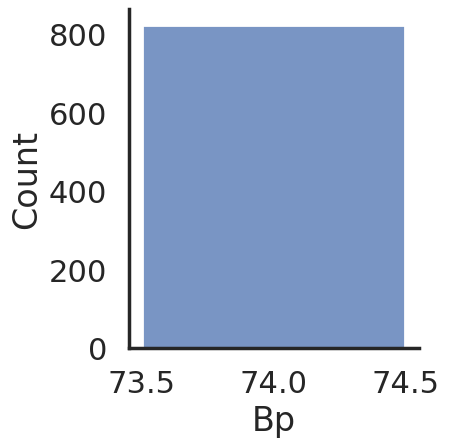

In [47]:
sns.displot(df.groupby(['run_id' ]).Bp.count().reset_index().sort_values('Bp').Bp)
plt.show()

In [48]:
mse_df.nsmallest(columns='MSE', n=20)

,Sample,full name,Group,compare_points,MSE,run_id,sen_param_model,idx,model,sen_param,sen_param_value,f_scale
933,1A0,Axenic,Axenic,74.0,48.901611,param_sensitivity_ponly_MIN_Mp_10_h-6350224087...,MIN_Mp,10,MIN,Mp,0.000001,NaN
2337,1A0,Axenic,Axenic,74.0,50.373336,param_sensitivity_ponly_MIN_Mp_11_h-4005430513...,MIN_Mp,11,MIN,Mp,0.000001,NaN
141,1A0,Axenic,Axenic,74.0,54.668648,param_sensitivity_ponly_MIN_KICp_0_h-276366306...,MIN_KICp,0,MIN,KICp,0.028550,NaN
1755,1A0,Axenic,Axenic,74.0,54.669046,param_sensitivity_ponly_MIN_KICp_1_h5817399541...,MIN_KICp,1,MIN,KICp,0.033821,NaN
261,1A0,Axenic,Axenic,74.0,54.669517,param_sensitivity_ponly_MIN_KICp_2_h-587032821...,MIN_KICp,2,MIN,KICp,0.040065,NaN
1359,1A0,Axenic,Axenic,74.0,54.670076,param_sensitivity_ponly_MIN_KICp_3_h-642780311...,MIN_KICp,3,MIN,KICp,0.047461,NaN
1599,1A0,Axenic,Axenic,74.0,54.670738,param_sensitivity_ponly_MIN_KICp_4_h4268934620...,MIN_KICp,4,MIN,KICp,0.056223,NaN
612,1A0,Axenic,Axenic,74.0,54.671522,param_sensitivity_ponly_MIN_KICp_5_h2091062636...,MIN_KICp,5,MIN,KICp,0.066602,NaN
2169,1A0,Axenic,Axenic,74.0,54.672070,param_sensitivity_ponly_MIN_VmaxINp_0_h3827538...,MIN_VmaxINp,0,MIN,VmaxINp,0.000016,NaN
1632,1A0,Axenic,Axenic,74.0,54.672451,param_sensitivity_ponly_MIN_KICp_6_h-181862465...,MIN_KICp,6,MIN,KICp,0.078898,NaN


In [49]:
mse_df['mode'] = 'sensitivity'
mse_df.loc[mse_df.idx.isin(['baseline']), 'mode'] = 'baseline'
mse_df.loc[mse_df.idx.isin(['vpro']), 'mode'] = 'vpro'


In [50]:
basedf['mode'] = 'sensitivity'
basedf.loc[basedf.idx.isin(['baseline']), 'mode'] = 'baseline'
basedf.loc[basedf.idx.isin(['vpro']), 'mode'] = 'vpro'


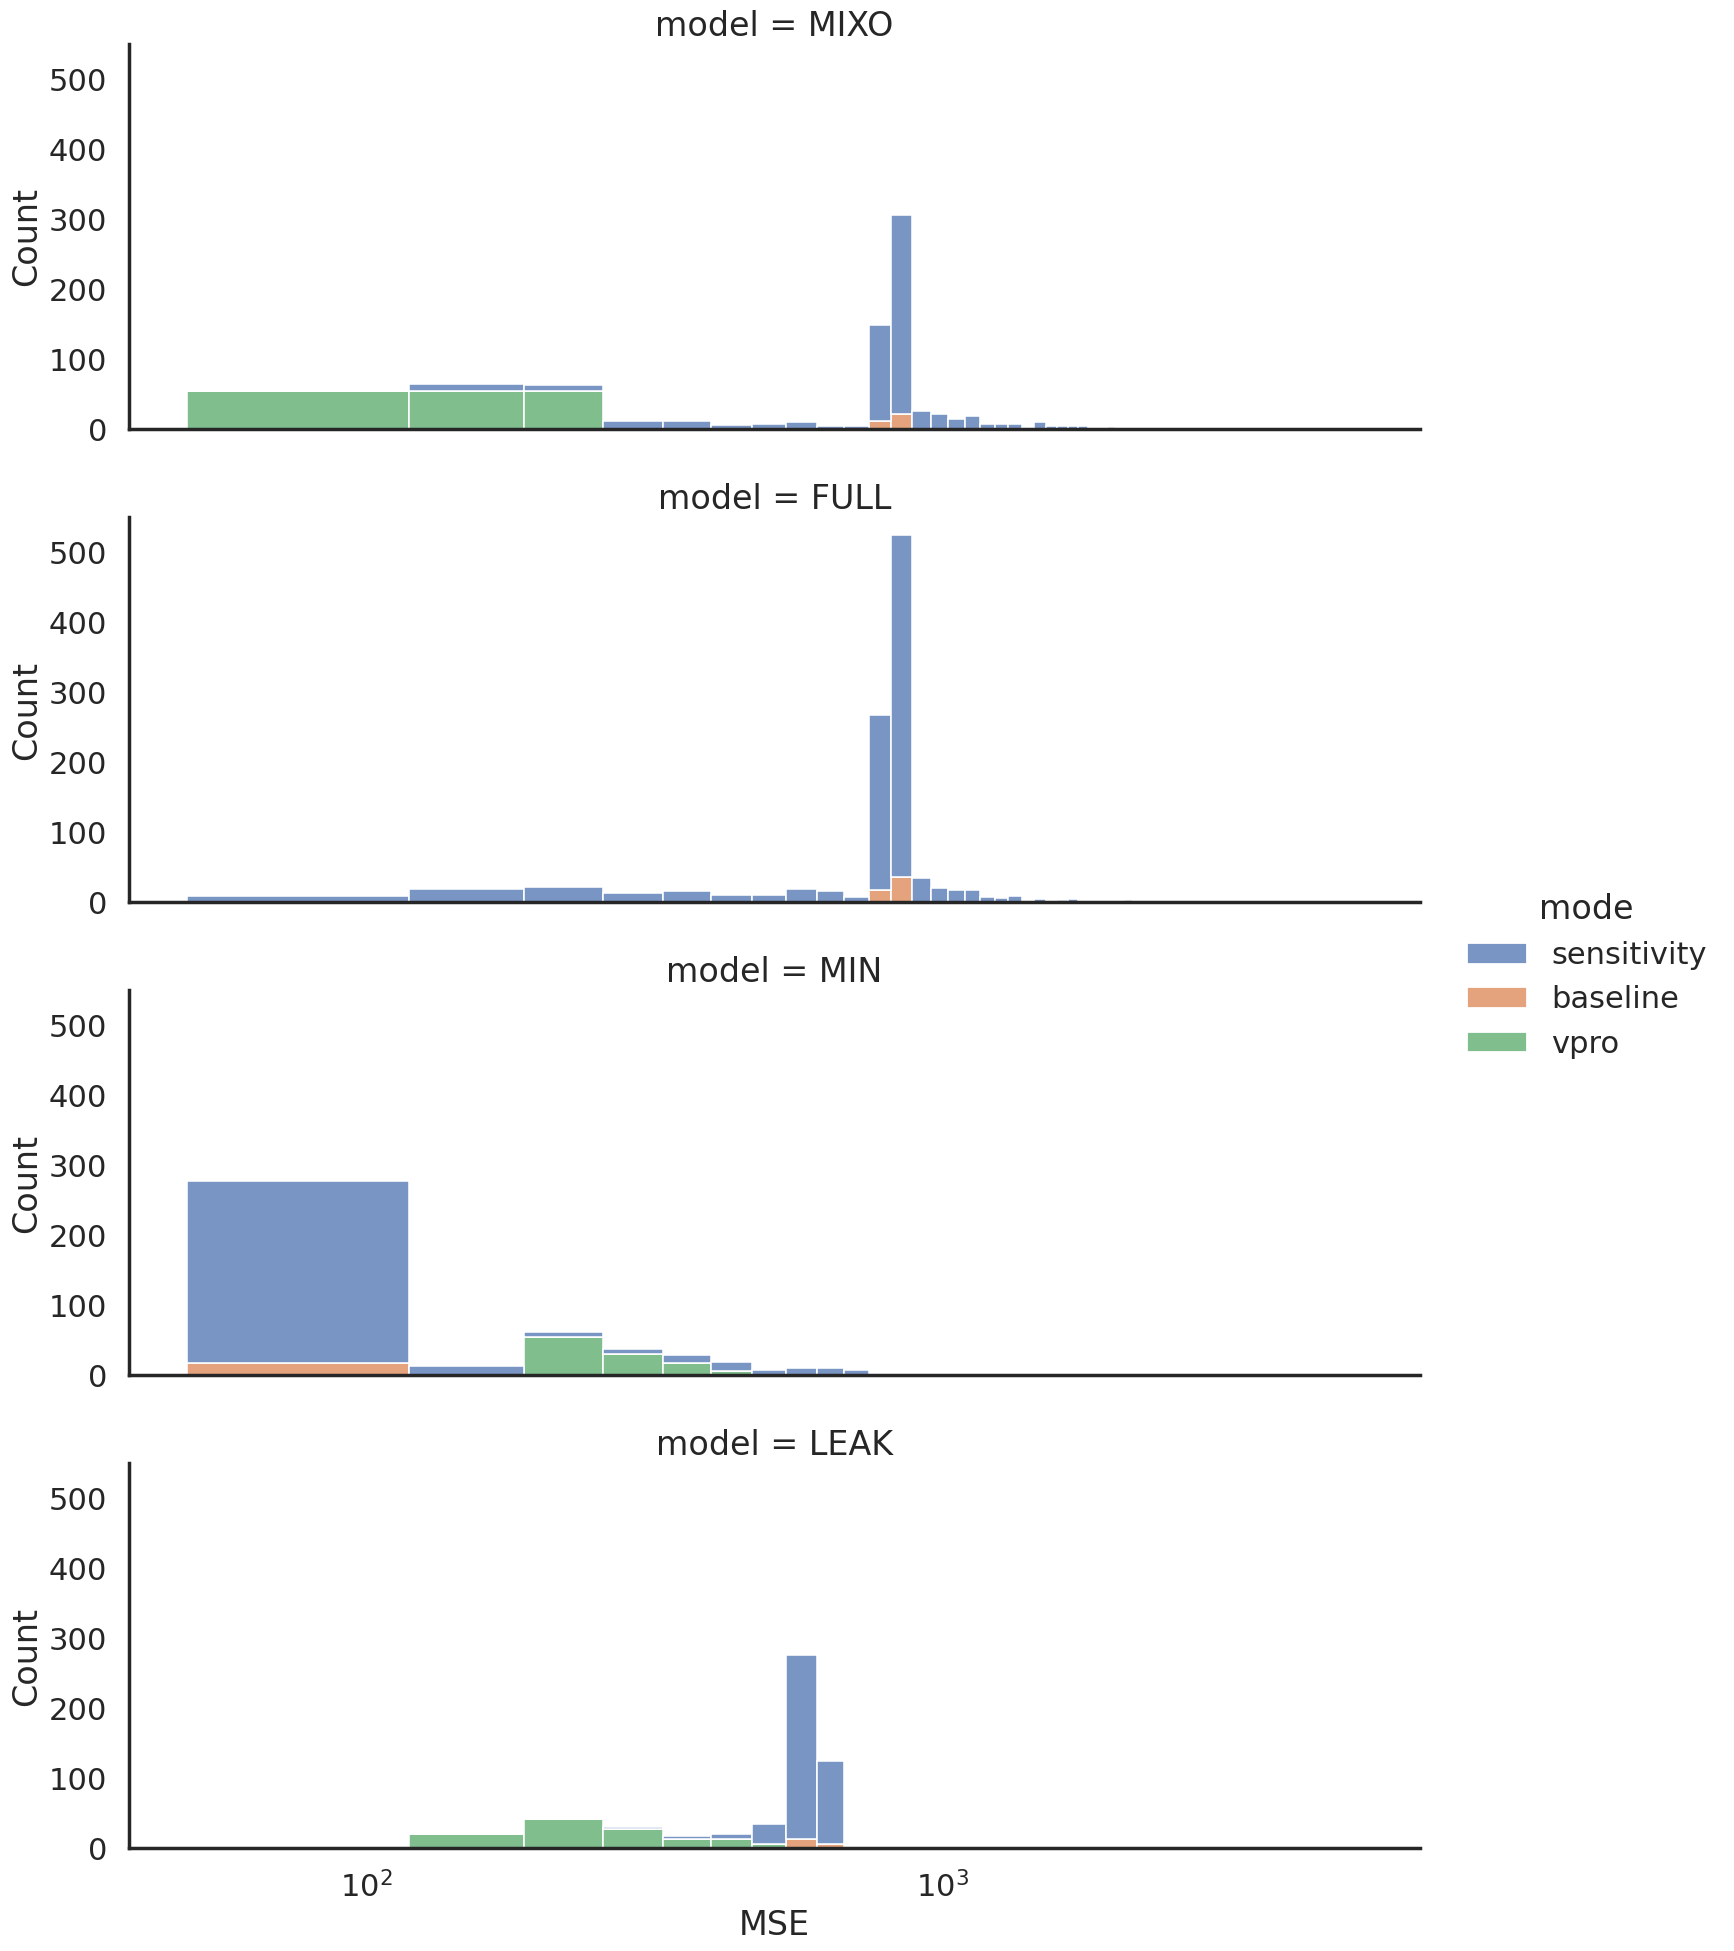

In [51]:
sns.displot(mse_df, x='MSE',aspect=3, row='model', hue='mode',multiple='stack' )
#sns.distplot(sum_df.p_err, label='P')
#sns.distplot(sum_df.error, label='Total')
#plt.legend()
plt.xscale('log')
plt.show()


In [52]:
df.min()

Bp                                                               0.0
DON                                                         0.003298
RDON                                                             0.0
DIN                                                         0.000736
DOC                                                         0.036257
RDOC                                                             0.0
DIC                                                         0.019431
ROS                                                         0.055182
ABp                                                              0.0
ABh                                                              0.0
t                                                                0.0
day                                                              0.0
Bp[C]                                                            0.0
ABp[C]                                                           0.0
ABh[C]                            

In [53]:
basedf.min()

/tmp/ipykernel_867811/2505142616.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  basedf.min()


Bp                        0.0
DON                  0.002532
RDON                      0.0
DIN                  0.000148
DOC                     132.5
RDOC                      0.0
DIC                  0.101415
ROS                  0.055182
ABp                       0.0
ABh                       0.0
t                         0.0
day                       0.0
Bp[C]                     0.0
ABp[C]                    0.0
ABh[C]                    0.0
run_id    baseline_ponly_FULL
idx                  baseline
model                    FULL
mode                 baseline
dtype: object

In [54]:
mse_df.idx.value_counts()

vpro        399
baseline    126
19          126
0           123
13          123
10          123
11          123
16          123
3           123
9           123
4           123
1           123
14          123
15          123
12          123
18          123
5           123
17          123
2           123
7           123
6           123
8           123
Name: idx, dtype: int64

In [55]:
sns.color_palette('Dark2')

In [56]:
model_name = 'MIN'
mpalette = sns.color_palette('Dark2', n_colors=3)
morder = ['sensitivity', 'baseline', 'vpro']
sensitivity_color= mpalette[0]
baseline_color= mpalette[1]
vpro_color= mpalette[2]

#all_df = pd.concat([df, basedf, vprodf], ignore_index=True)
min_porder = ['VmaxINp', 'KINp', 'VmaxICp', 'KICp', 'Mp', 'gammaDp']

In [57]:
mse_df.loc[mse_df.model.isin([model_name])].sen_param.unique()


array(['VmaxINp', 'gammaDp', 'Mp', 'KINp', 'VmaxICp', 'KICp'],
      dtype=object)

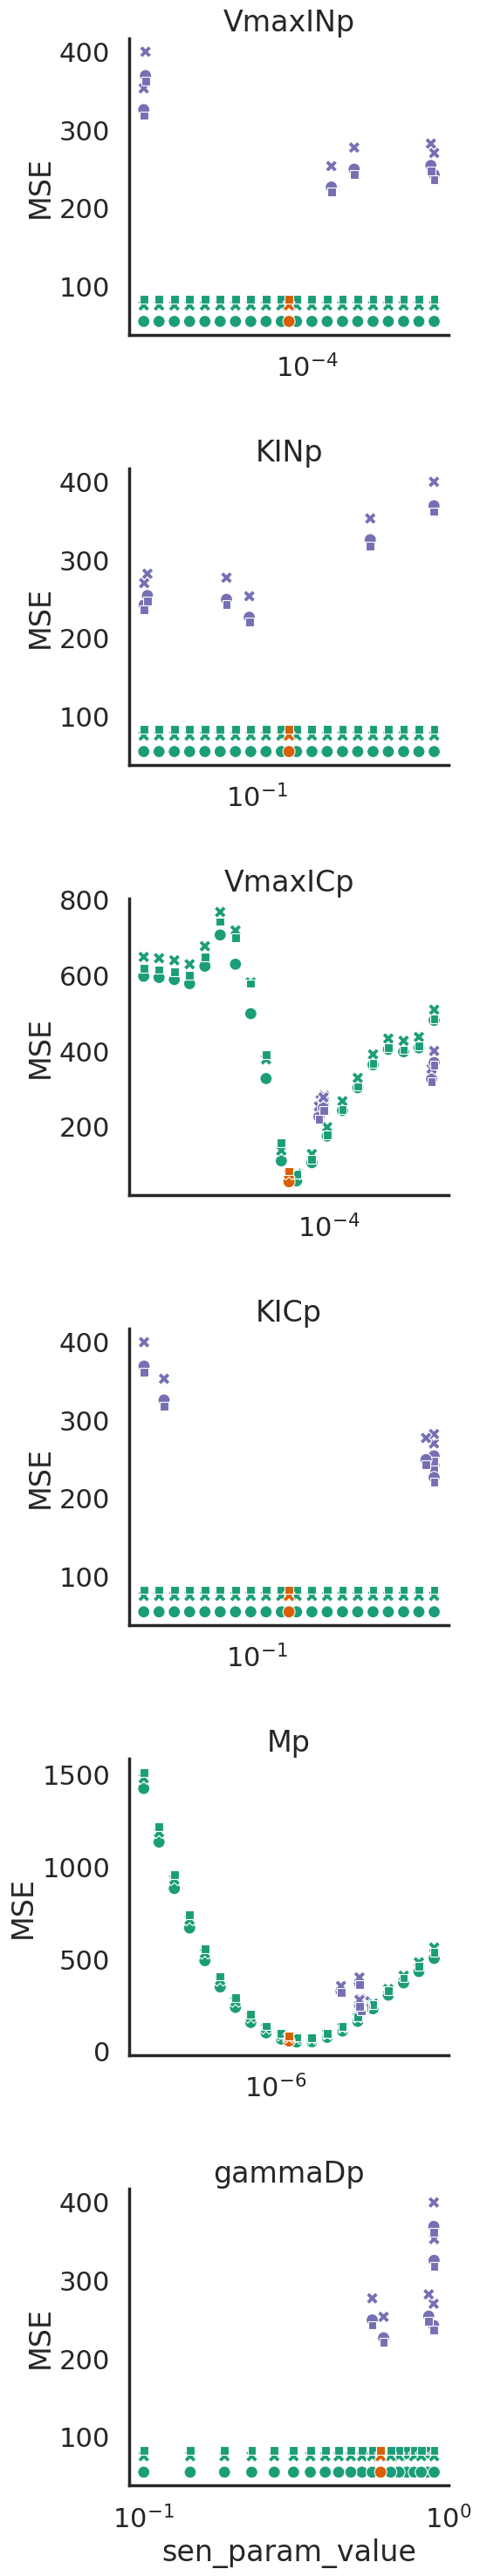

In [58]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin([model_name])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=2,
    row_order = min_porder,
    style='Sample', 
    hue ='mode', legend=False,
    palette=mpalette, hue_order=morder,
    s=100,
    aspect=1.2, #size='mode', size_order=['baseline', 'vpro', 'sensitivity'], sizes=(1000,500),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')
g.set_titles(row_template='{row_name}')

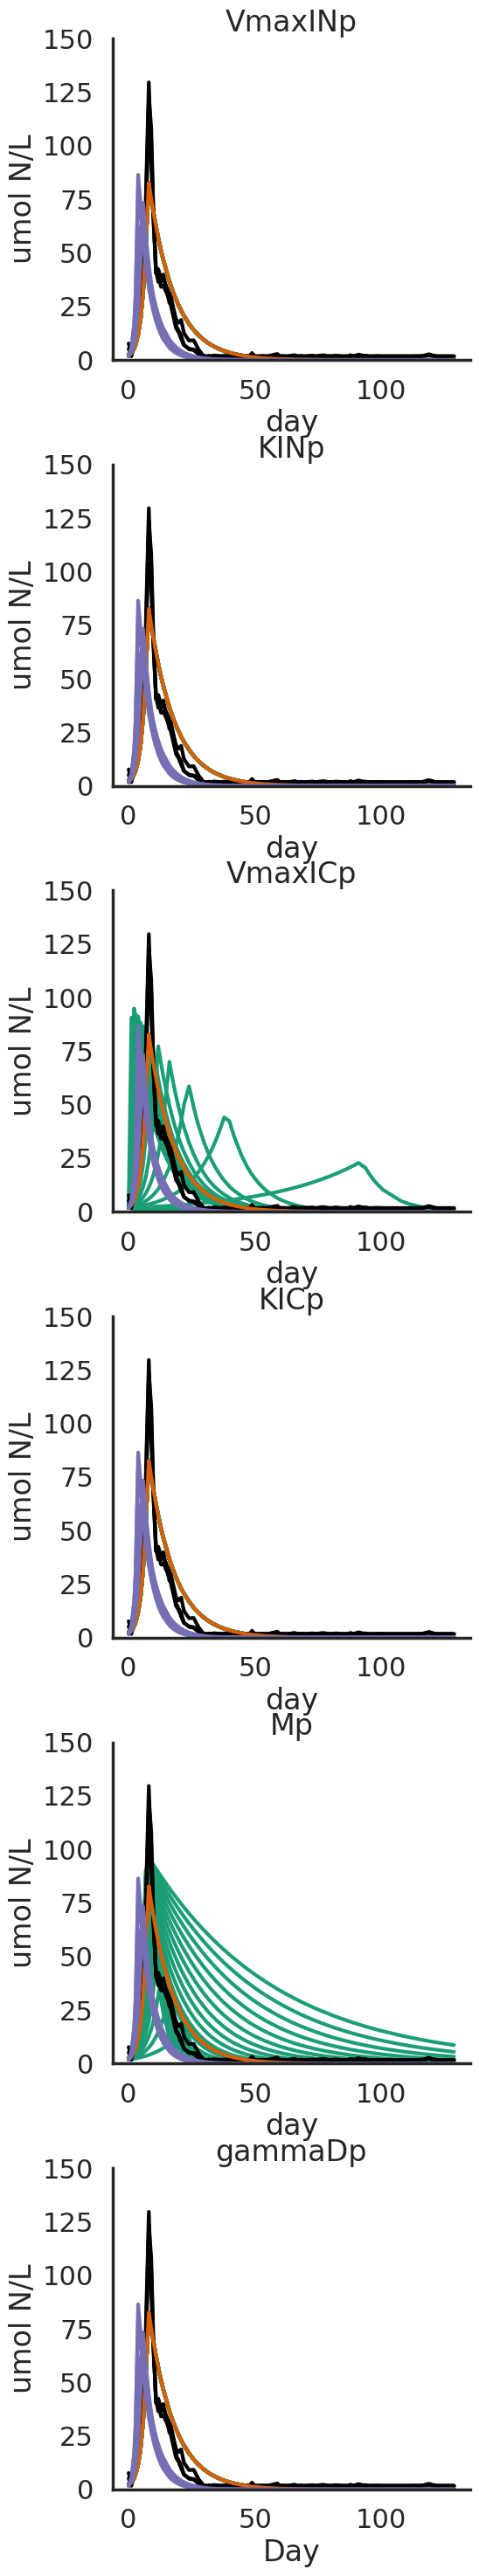

In [59]:
for m in ['MIN']:
    mdf2 = df.loc[df.model.isin([m])].melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=['Bp'])                            
    mdf2['Day'] =mdf2['day'].round(5)
    #mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
    mdf2['param_name'] =  mdf2['sen_param'] 

    #mdf2 = mdf2.loc[~mdf2['run_id'].isin(problematic_run_ids)]


    g = sns.relplot(
        data=mdf2, 
        x='Day', y='value',
        hue='variable', palette=[sensitivity_color], #hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        col='sen_param', #col_order= paramorder,
        col_order = min_porder,
        col_wrap=1,
        kind='line', #lw=1,
        aspect=1.2, legend=False,
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
        
    ).set(ylim=(0,150))

    for ax in g.axes:
        sns.lineplot(
            data=refdf.loc[refdf.Group.isin(['Axenic'])],
            x='day', y='ref_Bp',
            estimator=None, units='Sample',
            color='black', ax=ax
        )
        sns.lineplot(
            data=basedf.loc[basedf.model.isin([m])],
            x='day', y='Bp',
            estimator=None, units='run_id',
            hue= 'mode', hue_order=morder[1:], palette=mpalette[1:], legend=False, 
            ax=ax,
        )
        

    #g.map_dataframe(pp)


    g.set(ylabel='umol N/L')
    g.set_titles(col_template='{col_name}',)
    #plt.suptitle(m, y=1)
    plt.show()

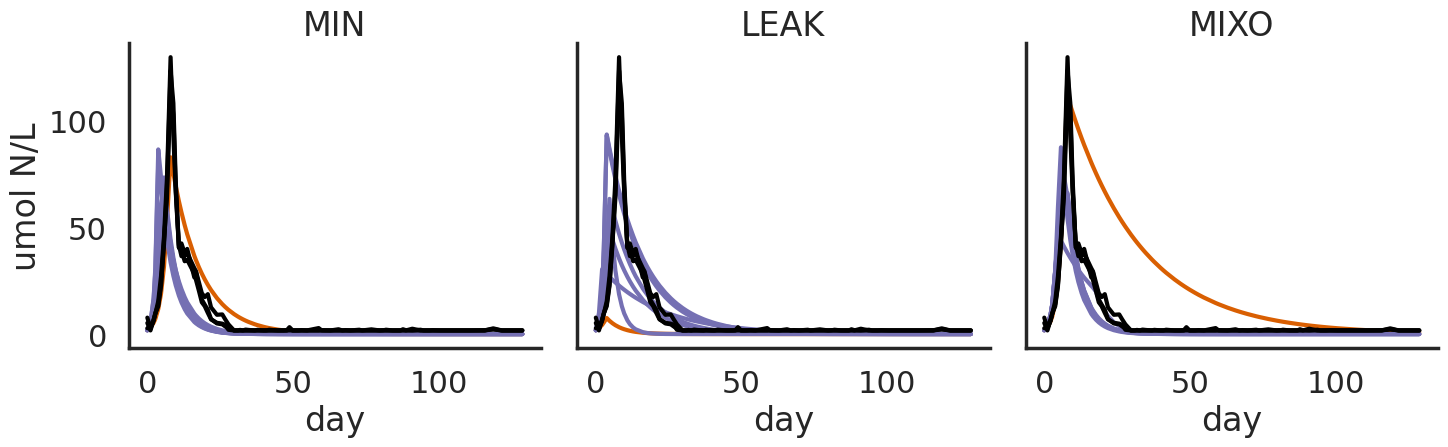

In [60]:
#base_df['model_'] = base_df['model_']

g = sns.relplot(
    data=basedf,# .loc[basedf.model.isin([m])],
    x='day', y='Bp', col='model', col_order=['MIN', 'LEAK', 'MIXO'],
    estimator=None, units='run_id', kind='line',
    hue= 'mode', hue_order=morder[1:], palette=mpalette[1:], legend=False, 
)
for ax in g.axes_dict.values():
    sns.lineplot(
            data=refdf.loc[refdf.Group.isin(['Axenic'])],
        x='day', y='ref_Bp',
        estimator=None, units='Sample',
        color='black', ax=ax
    )
g.set_titles(col_template='{col_name}',)
g.set(ylabel='umol N/L')


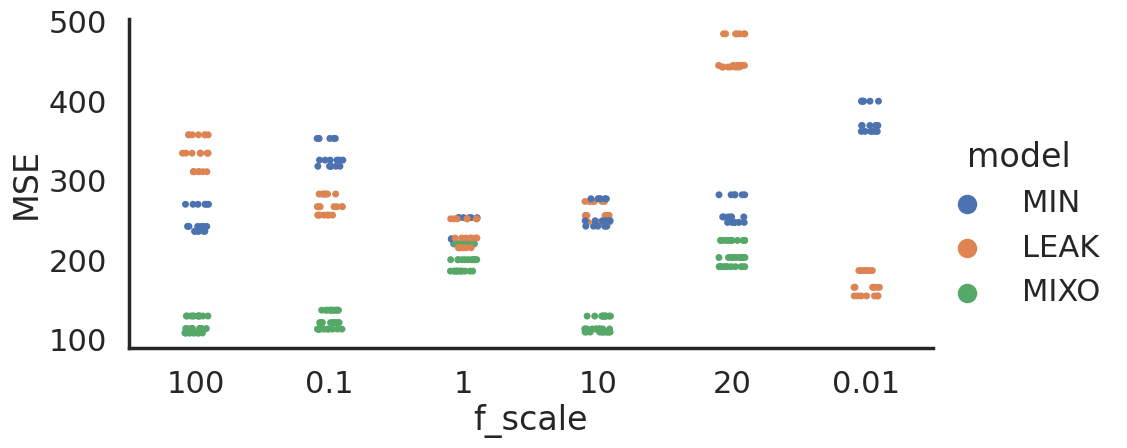

In [61]:
sns.catplot(
    data=basemse_df.loc[basemse_df.idx.isin(['vpro'])],
    x='f_scale', y='MSE', aspect=2, hue='model',
)

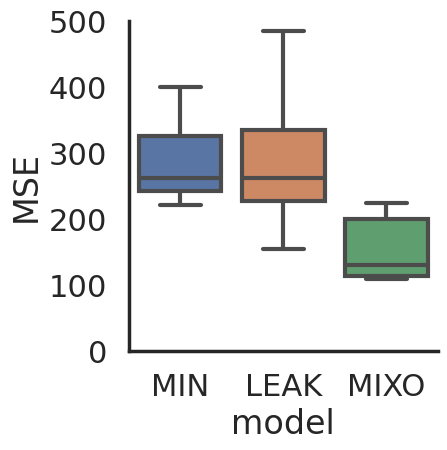

In [74]:
sns.catplot(
    data=basemse_df.loc[basemse_df.idx.isin(['vpro'])],
    x='model', y='MSE', aspect=1, hue='model',kind='box', dodge=False,
).set(ylim=(0,500))

In [62]:
refdf.dtypes

day             float64
Sample           object
id                int64
replicate        object
transfer          int64
transfer day      int64
heterotroph      object
full name        object
FL              float64
Group            object
predicted       float64
ref_Bp          float64
LOD                bool
t               float64
dtype: object

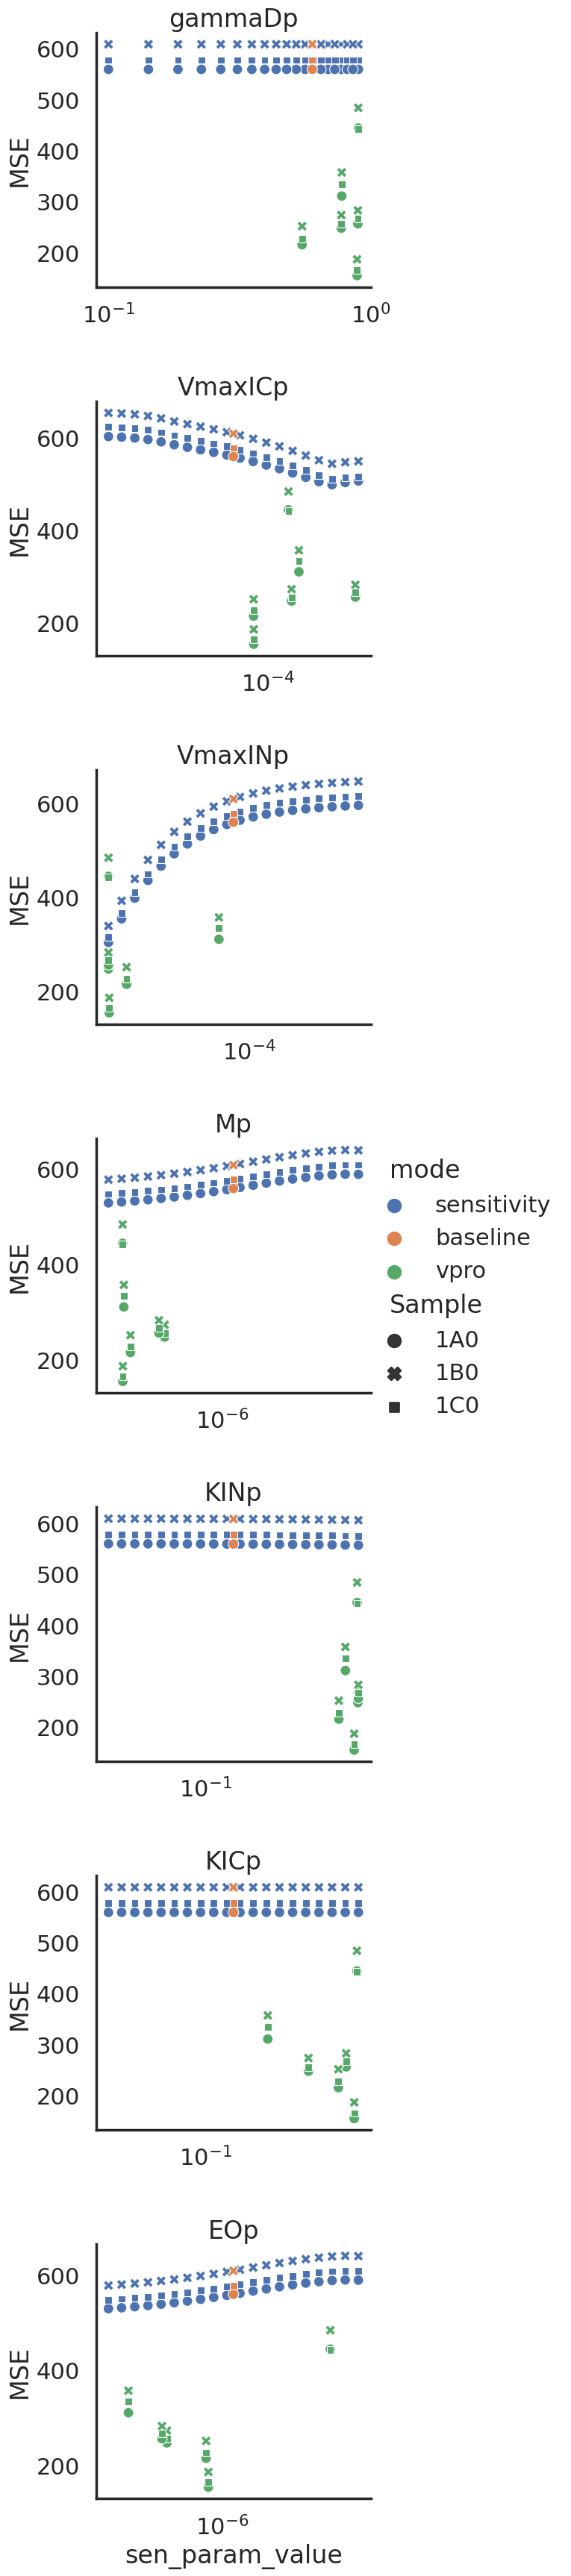

In [63]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['LEAK'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=2,
    style='Sample', 
    hue ='mode',
    s=100,
    aspect=1.2, #size='mode', size_order=['baseline', 'vpro', 'sensitivity'], sizes=(1000,500),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')
g.set_titles(row_template='{row_name}')

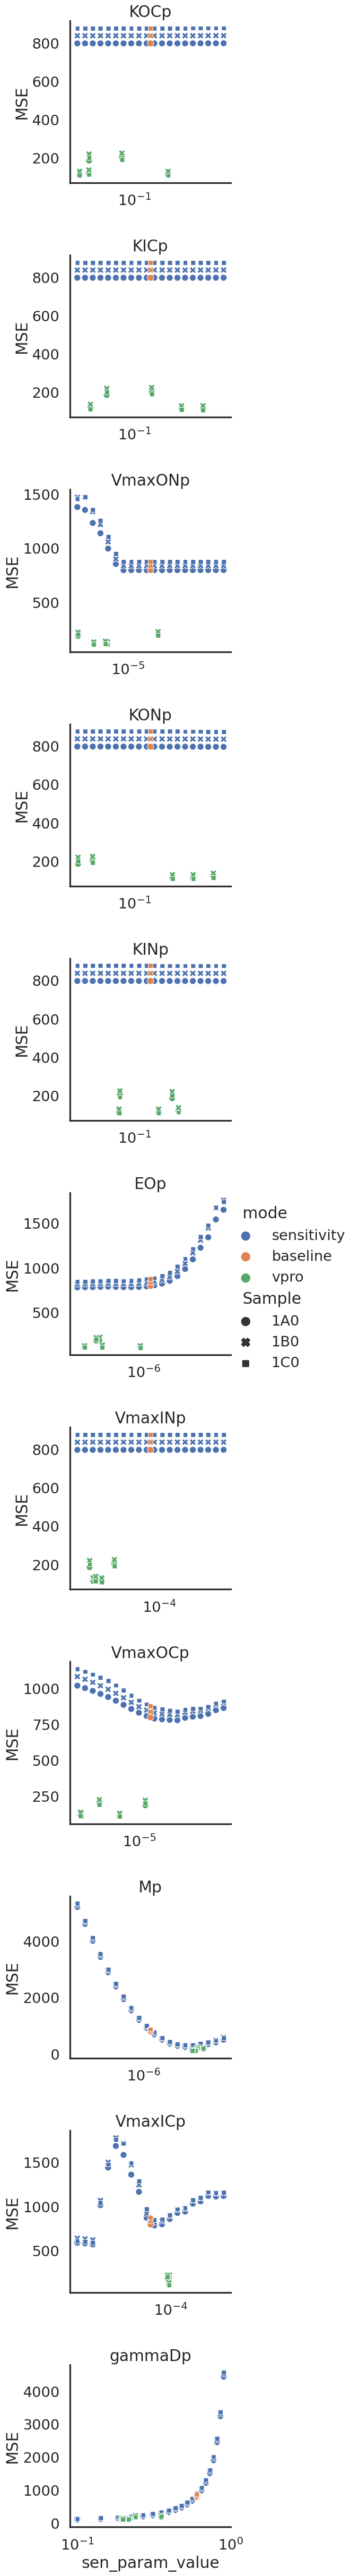

In [64]:
g = sns.relplot(
    data=mse_df.loc[mse_df.model.isin(['MIXO'])], 
    x='sen_param_value', y='MSE', #log_scale=(True,False), 
    row='sen_param', #col_wrap=2,
    style='Sample', 
    hue ='mode',
    s=100,
    aspect=1.2, #size='mode', size_order=['baseline', 'vpro', 'sensitivity'], sizes=(1000,500),
    facet_kws={'sharey': False, 'sharex': False}, #common_bins=False, 
)#.set(ylim=(50,200))
g.set(xscale='log')
g.set_titles(row_template='{row_name}')

In [65]:
mse_df.loc[mse_df.model.isin(['MIN'])].drop_duplicates(['run_id']).groupby (['sen_param', 'model'])['idx'].count()

sen_param  model
KICp       MIN      20
KINp       MIN      20
Mp         MIN      27
VmaxICp    MIN      20
VmaxINp    MIN      20
gammaDp    MIN      20
Name: idx, dtype: int64

In [66]:
lowest_ids = mse_df.nsmallest(columns='MSE', n=10)['run_id']

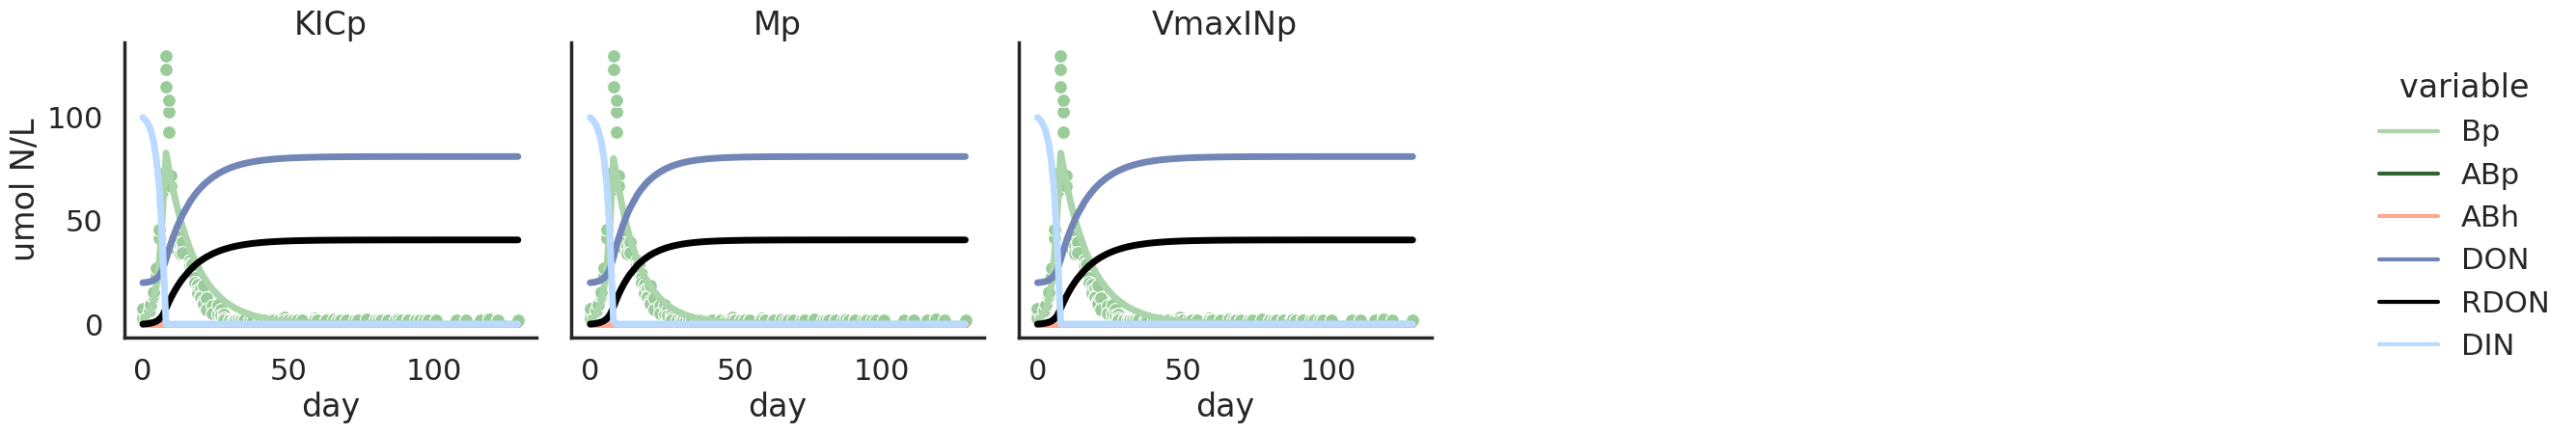

In [67]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't', 'sen_param', 'model', ], value_vars=pnorder)                            
mdf2['Day'] =mdf2['day'].round(5)
#mdf2['param_name'] = '$' + mdf2['sen_param'] + '$'
mdf2['param_name'] =  mdf2['sen_param'] 

g = sns.relplot(
    data=mdf2.loc[mdf2.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=pnorder, palette=pnpalette,
    #estimator=None, units='run_id',
    col='sen_param', #col_order=lowest_ids, 
    col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf.loc[refdf.Group.isin(['Axenic'])], x='day', y='ref_Bp', ax=ax, s=100, legend=False, color=PCOLOR)
    #sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [68]:
plt.show()

In [69]:
lowest_ids

933     param_sensitivity_ponly_MIN_Mp_10_h-6350224087...
2337    param_sensitivity_ponly_MIN_Mp_11_h-4005430513...
141     param_sensitivity_ponly_MIN_KICp_0_h-276366306...
1755    param_sensitivity_ponly_MIN_KICp_1_h5817399541...
261     param_sensitivity_ponly_MIN_KICp_2_h-587032821...
1359    param_sensitivity_ponly_MIN_KICp_3_h-642780311...
1599    param_sensitivity_ponly_MIN_KICp_4_h4268934620...
612     param_sensitivity_ponly_MIN_KICp_5_h2091062636...
2169    param_sensitivity_ponly_MIN_VmaxINp_0_h3827538...
1632    param_sensitivity_ponly_MIN_KICp_6_h-181862465...
Name: run_id, dtype: object